# <font color=#800080>Heart Data Classification Project by Alireza Kia</font>

# <font color=#4d4dff>First Aspect</font>

## Import Initial Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import stats
from statsmodels import robust
import statsmodels
from scipy import stats

## Import Data

In [2]:
df = pd.read_csv('C:/Users/Pooria/Heart data.csv')

## General View of The Data

In [3]:
df.head()

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0                 63    1           1           145.0         233.0   
1                 37    1           3           130.0         250.0   
2                 41    0           2           130.0         204.0   
3                 56    1           2           120.0         236.0   
4                 57    0           4           120.0         354.0   

   blood sugar  electrocardiographic   heart rate  exercise induced  \
0          1.0                    2.0       150.0               0.0   
1          0.0                    0.0       187.0               0.0   
2          0.0                    2.0       172.0               0.0   
3          0.0                    0.0       178.0               0.0   
4          0.0                    0.0       163.0               1.0   

   depression   slope   ca  thal  c  
0          2.3    3.0  0.0   6.0  0  
1          3.5    3.0  0.0   3.0  0  
2          1.4    1.0  0.0   3.0  0  
3          0.8    1.0  0.0   3.0  0  
4          0.6    1.0  0.0   3.0  0

In [4]:
df.tail()

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
592                 52    1           4           140.0         266.0   
593                 43    1           4           140.0         288.0   
594                 41    1           4           120.0         336.0   
595                 44    1           4           135.0         491.0   
596                 49    1           4           150.0         222.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
592          0.0                    0.0       134.0               1.0   
593          0.0                    0.0       135.0               1.0   
594          0.0                    0.0       118.0               1.0   
595          0.0                    0.0       135.0               0.0   
596          0.0                    0.0       122.0               0.0   

     depression   slope  ca  thal  c  
592          2.0    2.0 NaN   NaN  1  
593          2.0    2.0 NaN   NaN  1  
594          3.0    2.0 NaN   NaN  1  
595          0.0    NaN NaN   NaN  1  
596          2.0    2.0 NaN   NaN  1

In [5]:
df.columns

Index(['Age (age in year)', 'sex', 'chest pain', 'blood pressure',
       'cholestoral ', 'blood sugar', 'electrocardiographic ', 'heart rate',
       'exercise induced', 'depression ', 'slope', 'ca', 'thal', 'c'],
      dtype='object')

In [6]:
df.describe()

Age (age in year)         sex  chest pain  blood pressure  \
count         597.000000  597.000000  597.000000      596.000000   
mean           51.182580    0.701843    3.072027      132.129195   
std             9.074366    0.457833    0.965776       17.603812   
min            28.000000    0.000000    1.000000       92.000000   
25%            44.000000    0.000000    2.000000      120.000000   
50%            52.000000    1.000000    3.000000      130.000000   
75%            58.000000    1.000000    4.000000      140.000000   
max            77.000000    1.000000    4.000000      200.000000   

       cholestoral   blood sugar  electrocardiographic   heart rate  \
count    574.000000   589.000000             596.000000  596.000000   
mean     248.655052     0.110357               0.610738  144.456376   
std       59.784805     0.313600               0.869358   23.794282   
min       85.000000     0.000000               0.000000   71.000000   
25%      211.000000     0.000000               0.000000  128.000000   
50%      242.500000     0.000000               0.000000  146.000000   
75%      278.750000     0.000000               2.000000  162.000000   
max      603.000000     1.000000               2.000000  202.000000   

       exercise induced  depression        slope          ca        thal  \
count        596.000000   597.000000  407.000000  303.000000  329.000000   
mean           0.315436     0.816248    1.675676    0.693069    4.811550   
std            0.465080     1.067938    0.572758    1.049212    1.928854   
min            0.000000     0.000000    1.000000    0.000000    3.000000   
25%            0.000000     0.000000    1.000000    0.000000    3.000000   
50%            0.000000     0.200000    2.000000    0.000000    3.000000   
75%            1.000000     1.500000    2.000000    1.000000    7.000000   
max            1.000000     6.200000    3.000000    9.000000    7.000000   

                c  
count  597.000000  
mean     0.410385  
std      0.492316  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age (age in year)      597 non-null    int64  
 1   sex                    597 non-null    int64  
 2   chest pain             597 non-null    int64  
 3   blood pressure         596 non-null    float64
 4   cholestoral            574 non-null    float64
 5   blood sugar            589 non-null    float64
 6   electrocardiographic   596 non-null    float64
 7   heart rate             596 non-null    float64
 8   exercise induced       596 non-null    float64
 9   depression             597 non-null    float64
 10  slope                  407 non-null    float64
 11  ca                     303 non-null    float64
 12  thal                   329 non-null    float64
 13  c                      597 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 65.4 KB


## Checking Records of The Features 

In [8]:
for col in df.columns:
    print(f"Columns: {col}")
    print(df[col].unique())
    print("-" * 50)

Columns: Age (age in year)
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 36 32 31 28 30 33 77]
--------------------------------------------------
Columns: sex
[1 0]
--------------------------------------------------
Columns: chest pain
[1 3 2 4]
--------------------------------------------------
Columns: blood pressure
[145. 130. 120. 140. 172. 150. 110. 135. 160. 105. 125. 142. 155. 104.
 138. 128. 108. 134. 122. 115. 118. 100. 124.  94. 112. 102. 152. 101.
 132. 148. 178. 129. 180. 136. 126. 106. 156. 170. 146. 113. 190.  98.
  nan 174. 158. 192. 154.  92. 117. 144. 200. 123. 164. 165. 114.]
--------------------------------------------------
Columns: cholestoral 
[233. 250. 204. 236. 354. 192. 294. 263. 199. 168. 239. 275. 266. 211.
 283. 219. 340. 226. 247. 234. 243. 302. 212. 175. 417. 197. 198. 177.
 273. 213. 304. 232. 269. 360. 308. 245. 208. 264. 321. 325. 235. 257.
 216. 256. 231. 141. 252. 201. 222. 2

# <font color=#4d4dff>EDA</font>

### First Correlation

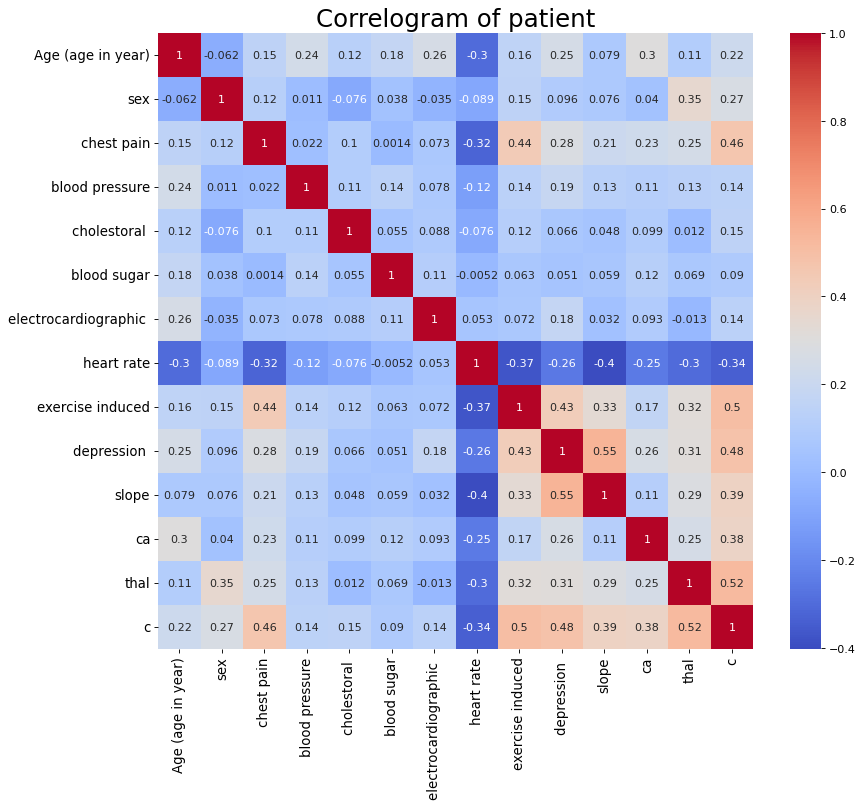

In [9]:
plt.figure(figsize = (12,10), dpi = 80)

sns.heatmap(df.corr(), xticklabels = df.corr(),
            yticklabels = df.corr(), cmap = "coolwarm",
            annot = True)

plt.title("Correlogram of patient", fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [10]:
df["c"].value_counts()

c
0    352
1    245
Name: count, dtype: int64

* Approximatley balance Data

### Total heart positive heart disease and total in seprated way by gender


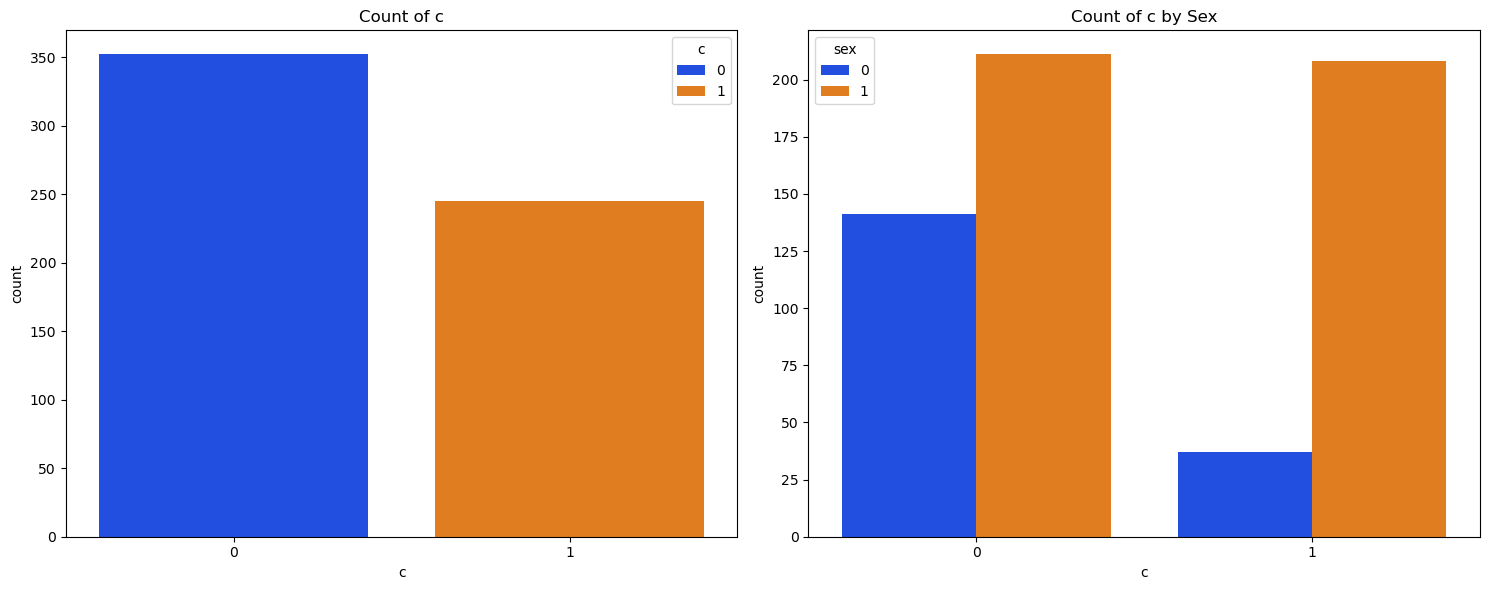

In [11]:
plt.figure(figsize = (15,6))

plt.subplot(1, 2, 1)
sns.countplot(x = 'c', data = df, palette = 'bright', hue = "c")
plt.title("Count of c")

plt.subplot(1, 2, 2)
sns.countplot(x = 'c', hue = 'sex', data = df, palette = 'bright')
plt.title("Count of c by Sex")

plt.tight_layout()
plt.show()

### Proportion of high-risk individuals (high BP & high cholesterol) who have heart disease, by age group

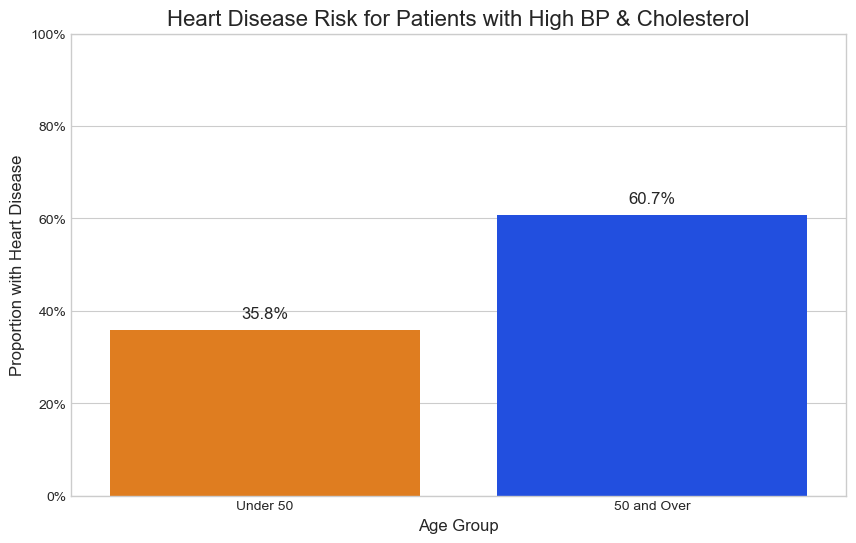

In [12]:
cholesterol_threshold = 239
bp_threshold = 130

df['has_high_cholesterol'] = df['cholestoral '] > cholesterol_threshold
df['has_high_bp'] = df['blood pressure'] >= bp_threshold

df['high_risk_combo'] = df['has_high_cholesterol'] & df['has_high_bp']

df['age_group'] = df['Age (age in year)'].apply(lambda x: '50 and Over' if x >= 50 else 'Under 50')

high_risk_df = df[df['high_risk_combo']].copy()

risk_by_age_group = high_risk_df.groupby('age_group')['c'].mean().reset_index()
risk_by_age_group.rename(columns={'c': 'heart_disease_proportion'}, inplace=True)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    x = 'age_group',
    y = 'heart_disease_proportion',
    data = risk_by_age_group,
    hue = "age_group",
    palette = "bright",
    order = ['Under 50', '50 and Over']
)
ax.set_title('Heart Disease Risk for Patients with High BP & Cholesterol', fontsize = 16)
ax.set_xlabel('Age Group', fontsize = 12)
ax.set_ylabel('Proportion with Heart Disease', fontsize = 12)
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
plt.ylim(0, 1)

for index, row in risk_by_age_group.iterrows():
    group = row['age_group']
    proportion = row['heart_disease_proportion']
    bar_index = 0 if group == 'Under 50' else 1
    ax.text(bar_index, proportion + 0.02, f'{proportion:.1%}', ha = 'center', va = 'bottom', fontsize = 12)

### Heart Disease Risk Factors in Patients with Normal Cholesterol

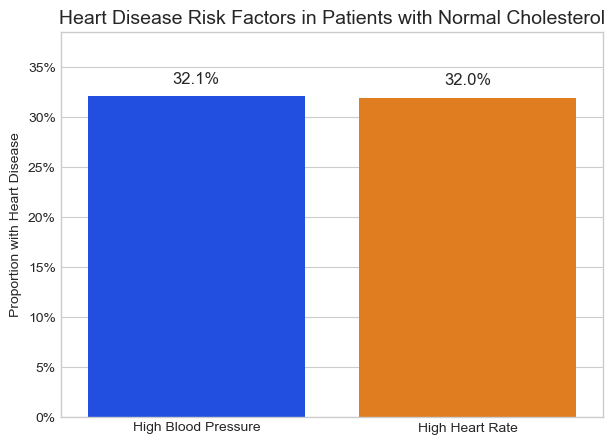

In [13]:
normal_cholesterol_threshold = 200
high_bp_threshold = 130
high_heart_rate_threshold = 100

normal_chol_df = df[df['cholestoral '] < normal_cholesterol_threshold].copy()

high_bp_group = normal_chol_df[normal_chol_df['blood pressure'] >= high_bp_threshold]
risk_high_bp = high_bp_group['c'].mean()

high_hr_group = normal_chol_df[normal_chol_df['heart rate'] > high_heart_rate_threshold]
risk_high_hr = high_hr_group['c'].mean()

risk_data = pd.DataFrame({
    'Factor': ['High Blood Pressure', 'High Heart Rate'],
    'Heart Disease Risk': [risk_high_bp, risk_high_hr]
})

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(7, 5))

sns.barplot(
    x = 'Factor',
    y = 'Heart Disease Risk',
    data = risk_data,
    hue = "Factor",
    palette = "bright"
)

ax.set_title('Heart Disease Risk Factors in Patients with Normal Cholesterol', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Proportion with Heart Disease', fontsize=10)
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
plt.ylim(0, max(risk_high_bp, risk_high_hr) * 1.2)

for index, row in risk_data.iterrows():
    ax.text(index, row['Heart Disease Risk'] + 0.01, f"{row['Heart Disease Risk']:.1%}", ha='center', va='bottom', fontsize=12)

### Heart Disease Risk by Sex, Chest Pain, and Exercise Angina

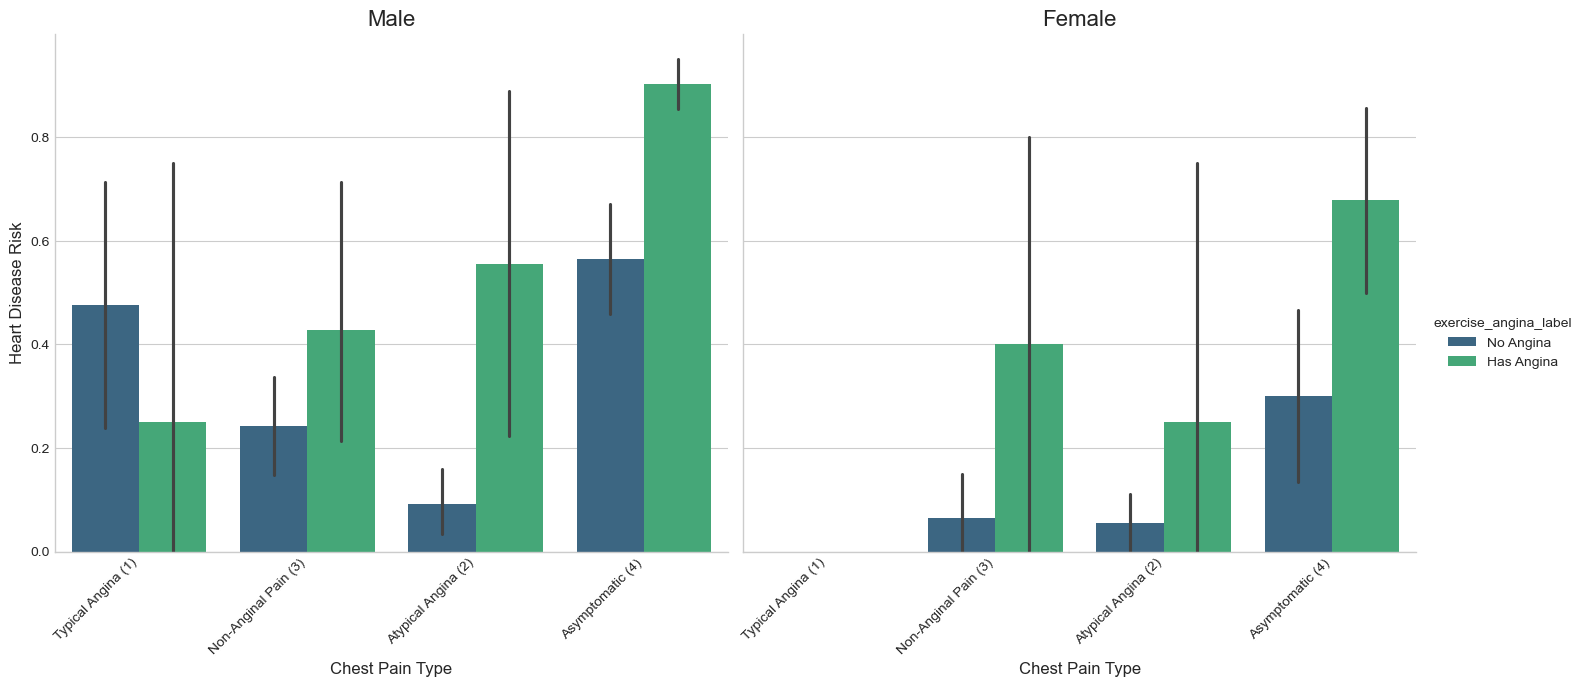

In [14]:
sex_map = {0: 'Female', 1: 'Male'}
df['sex_label'] = df['sex'].map(sex_map)

exang_map = {0: 'No Angina', 1: 'Has Angina'}
df['exercise_angina_label'] = df['exercise induced'].map(exang_map)

cp_map = {
    1: 'Typical Angina (1)',
    2: 'Atypical Angina (2)',
    3: 'Non-Anginal Pain (3)',
    4: 'Asymptomatic (4)'
}
df['chest_pain_label'] = df['chest pain'].map(cp_map)

catplot = sns.catplot(
        data = df,
        x = 'chest_pain_label',
        y = 'c',
        hue = 'exercise_angina_label',
        col = 'sex_label',
        kind = 'bar',
        height = 6,
        aspect = 1.2,
        palette = 'viridis',
)

catplot.set_titles("{col_name}", size=16)
catplot.set_axis_labels("Chest Pain Type", "Heart Disease Risk", size=12)
catplot.set_xticklabels(rotation=45, ha='right')

### Correlation between age and cholestoral seprated by gender and heart disease

<Axes: xlabel='cholestoral ', ylabel='Age (age in year)'>

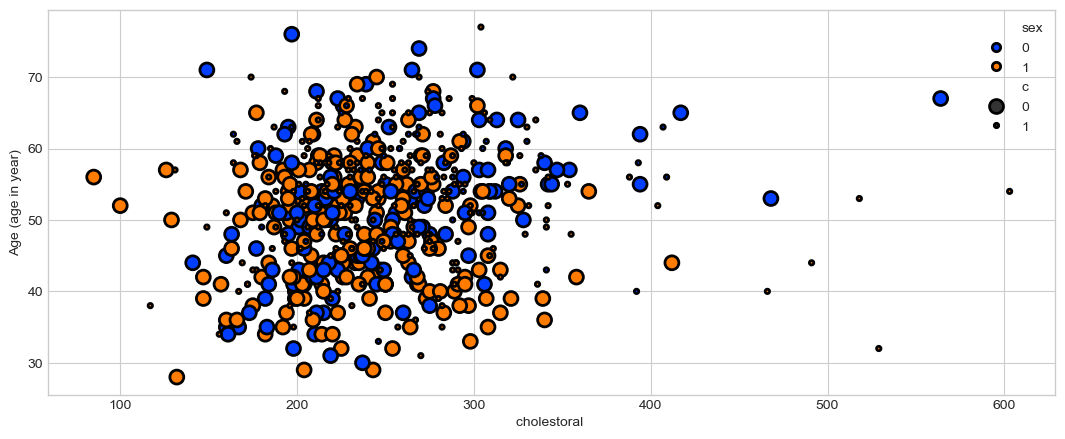

In [15]:
plt.figure(figsize = (13,5))
sns.scatterplot(x = "cholestoral ", y = "Age (age in year)", size = "c",
                palette = "bright",
                hue = "sex",
                sizes = (10 , 100), linewidth = 2, edgecolor = "k", data = df)

### Amount of blood pressure and heart rate based on age

<Axes: xlabel='heart rate', ylabel='Age (age in year)'>

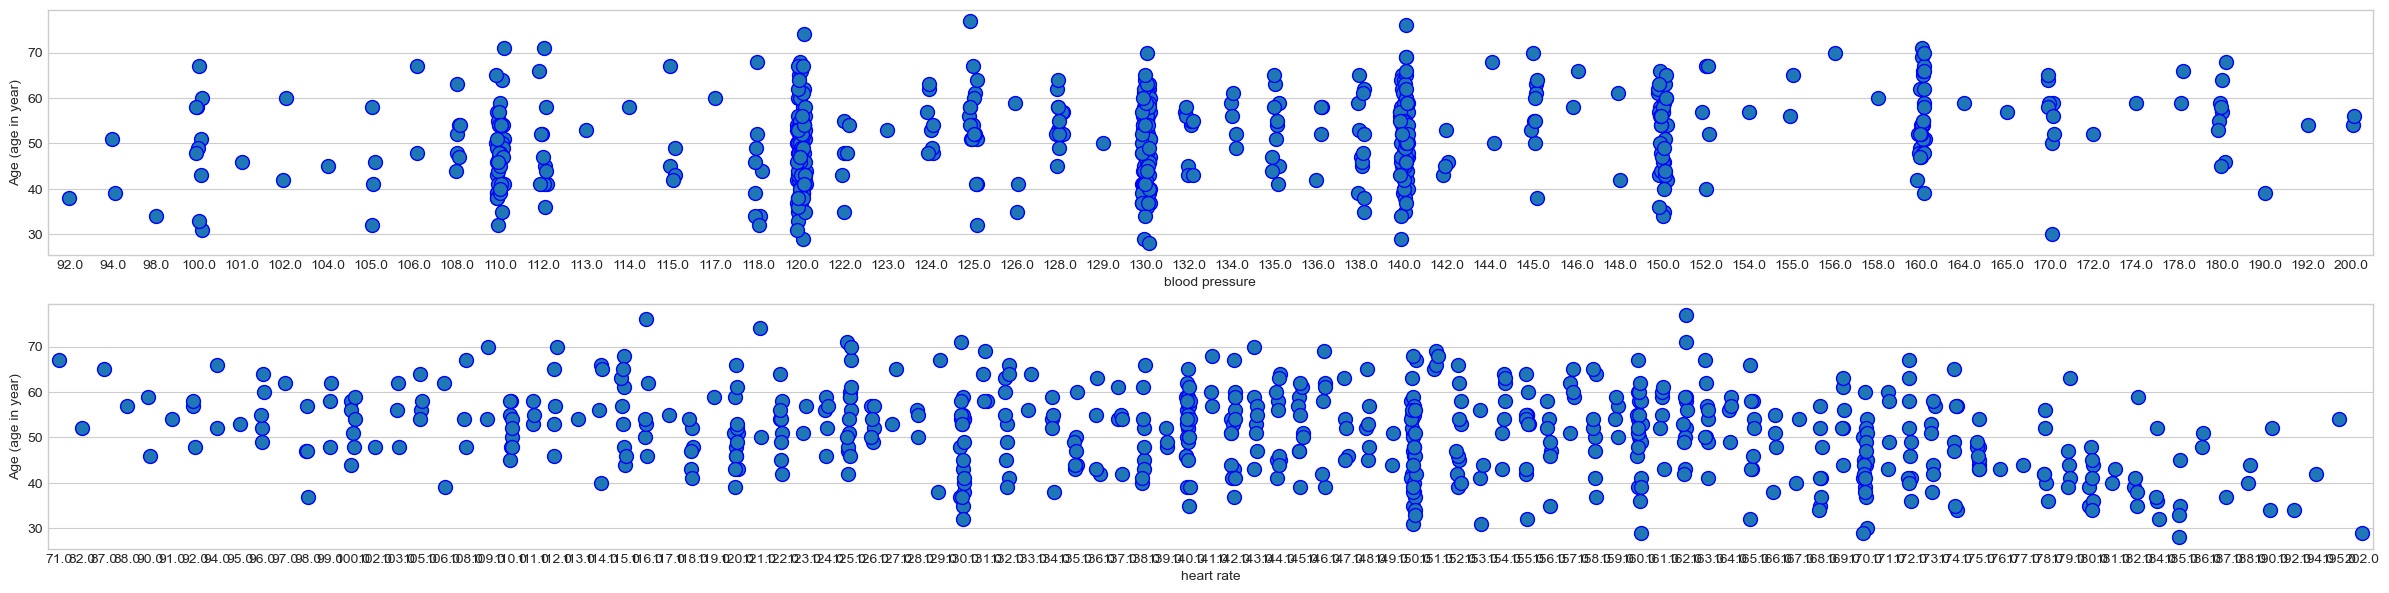

In [16]:
plt.figure(figsize = (30,7), facecolor = "w")
plt.subplot(2,1,1)
sns.stripplot(x = df["blood pressure"], y = df["Age (age in year)"], size = 10, linewidth = 1, edgecolor = "blue") 
plt.subplot(2,1,2)
sns.stripplot(x = df["heart rate"], y = df["Age (age in year)"], size = 10, linewidth = 1, edgecolor = "blue") 

### Total correlation between important features based on heart disease

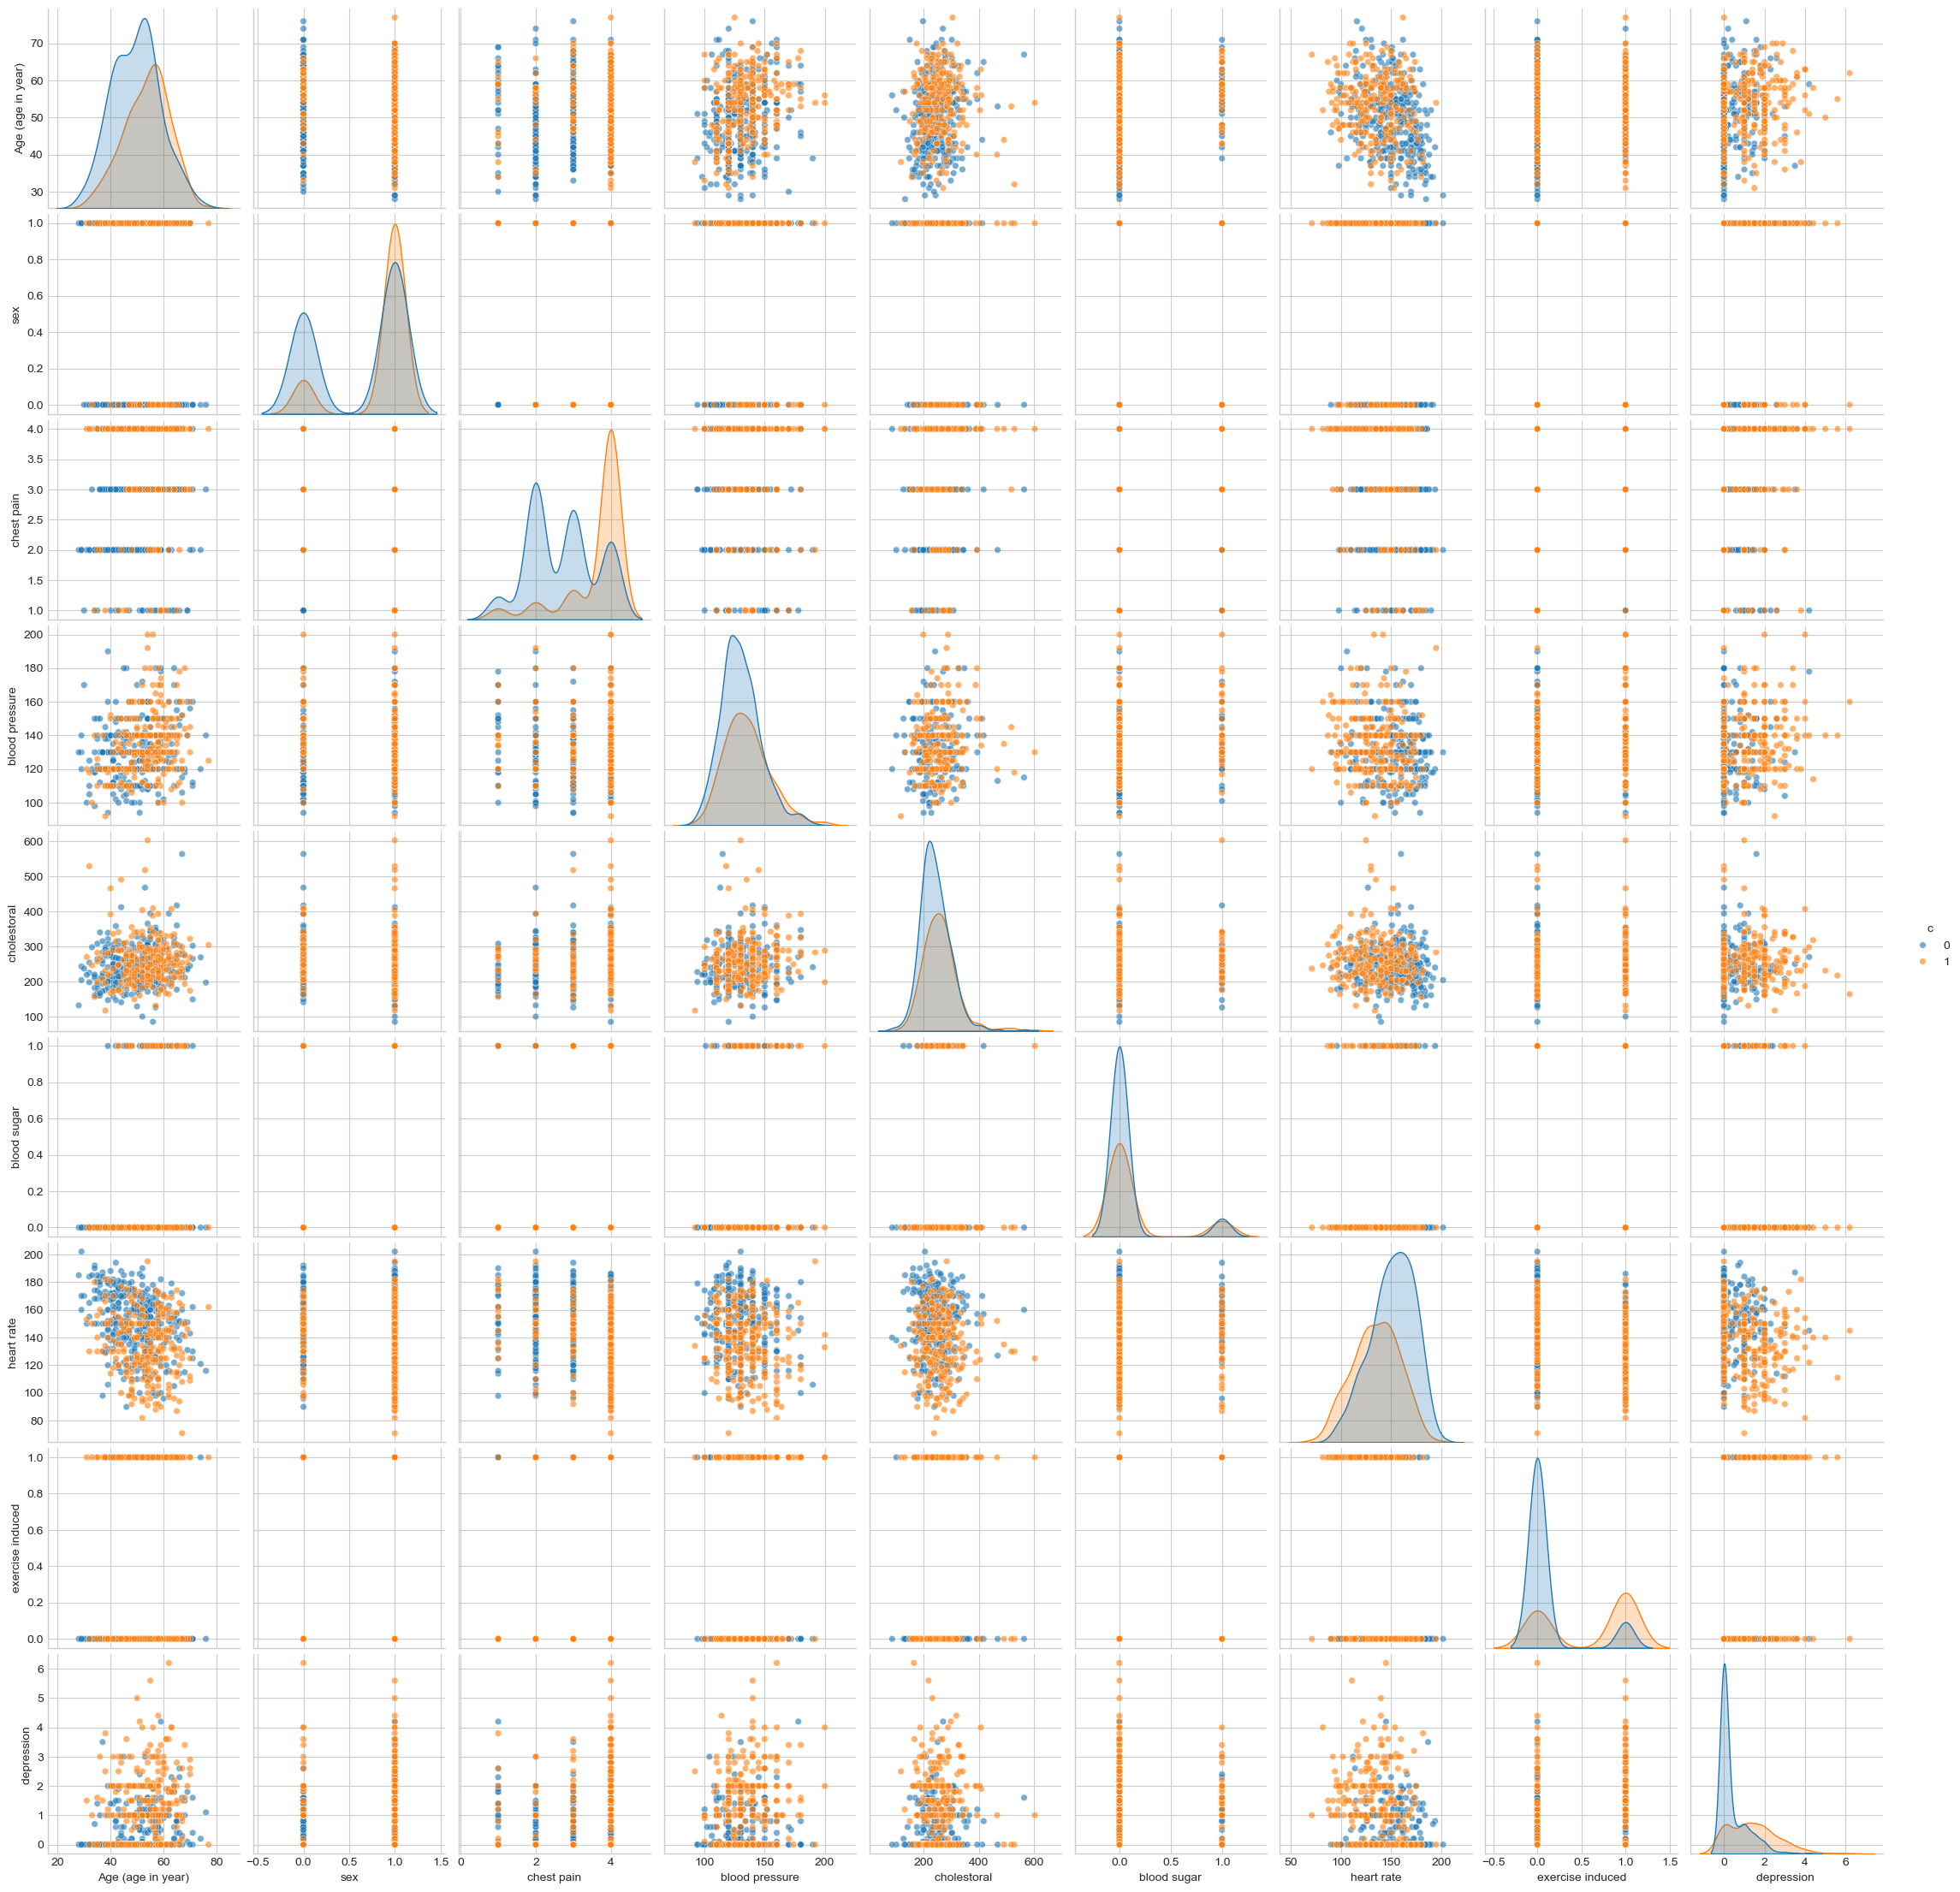

In [17]:
numeric_cols = ['Age (age in year)', 'sex', 'chest pain', 'blood pressure',
       'cholestoral ', 'blood sugar', 'heart rate',
       'exercise induced', 'depression ', 'c']

sns.pairplot(
    df[numeric_cols],
    kind="scatter",
    hue="c",
    height=2.5,
    plot_kws={'alpha': 0.6, 's': 30}
)

plt.show()

### Total correlation between important features based on gender

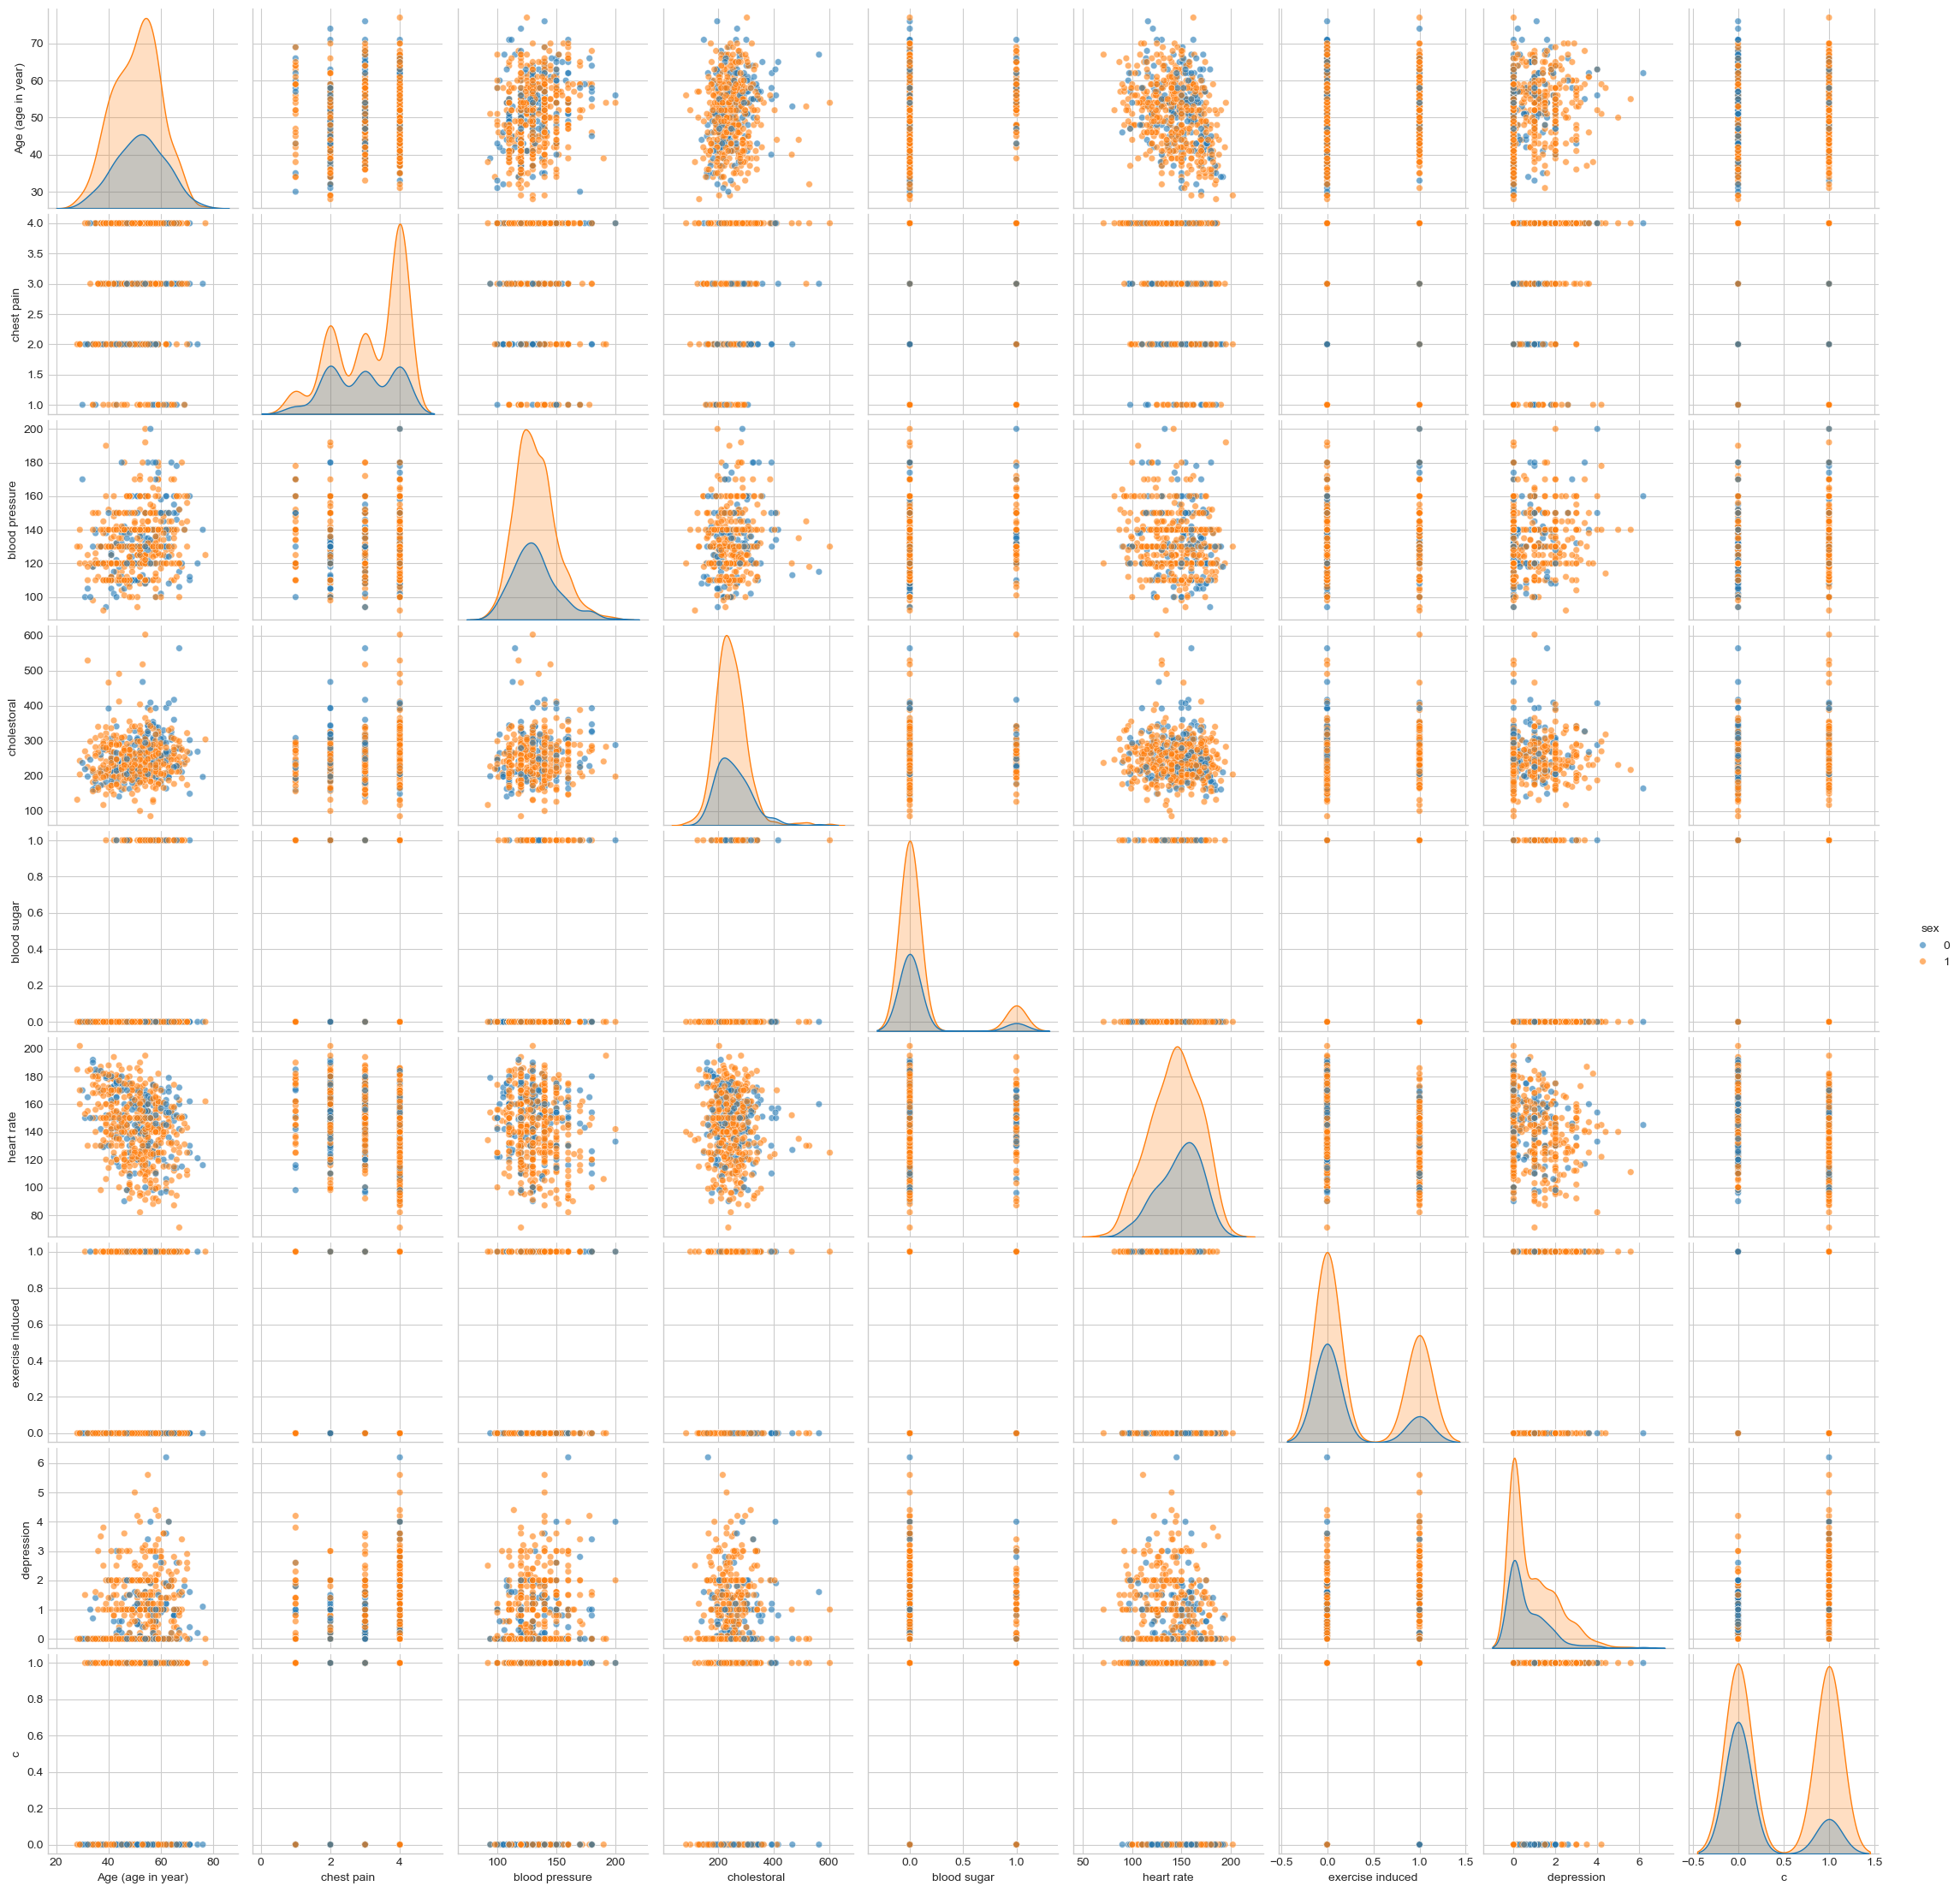

In [18]:
numeric_cols = ['Age (age in year)', 'sex', 'chest pain', 'blood pressure',
       'cholestoral ', 'blood sugar', 'heart rate',
       'exercise induced', 'depression ', 'c']

sns.pairplot(
    df[numeric_cols],
    kind="scatter",
    hue="sex",
    height=2.5,
    plot_kws={'alpha': 0.6, 's': 30}
)

plt.show()

### Profile of Patients with High Blood Sugar but No Exercise Angina

Text(0.5, 1.02, 'Profile of Patients with High Blood Sugar but No Exercise Angina')

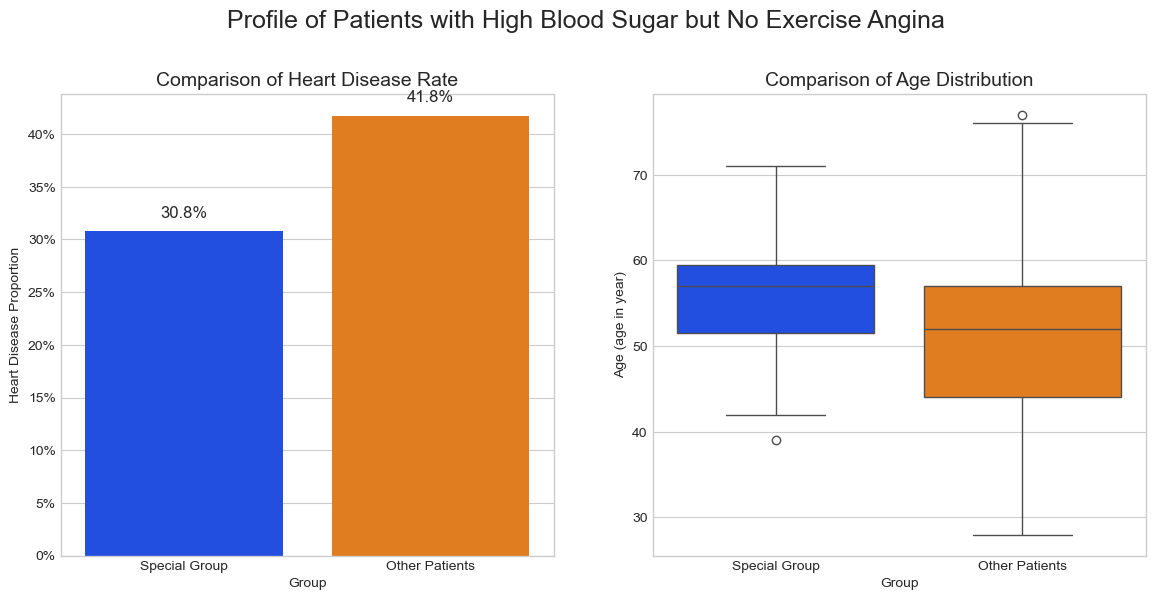

In [19]:
special_group = df[(df['blood sugar'] == 1) & (df['exercise induced'] == 0)].copy()

other_patients = df.drop(special_group.index).copy()

special_group_disease_rate = special_group['c'].mean()
other_patients_disease_rate = other_patients['c'].mean()

profile_comparison = pd.DataFrame({
    'Special Group': special_group[['Age (age in year)', 'blood pressure', 'cholestoral ', 'heart rate']].mean(),
    'Other Patients': other_patients[['Age (age in year)', 'blood pressure', 'cholestoral ', 'heart rate']].mean()
})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

disease_rates_data = pd.DataFrame({
    'Group': ['Special Group', 'Other Patients'],
    'Rate': [special_group_disease_rate, other_patients_disease_rate]
})
sns.barplot(data=disease_rates_data, x='Group', y='Rate', ax=axes[0], hue = 'Group', palette = "bright")
axes[0].set_title('Comparison of Heart Disease Rate', fontsize=14)
axes[0].set_ylabel('Heart Disease Proportion')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
for i, rate in enumerate(disease_rates_data['Rate']):
    axes[0].text(i, rate + 0.01, f'{rate:.1%}', ha='center', va='bottom', fontsize=12)

special_group['Group'] = 'Special Group'
other_patients['Group'] = 'Other Patients'
combined_df = pd.concat([special_group, other_patients])

sns.boxplot(data=combined_df, x='Group', y='Age (age in year)', ax=axes[1], hue = 'Group', palette = "bright")
axes[1].set_title('Comparison of Age Distribution', fontsize=14)

plt.suptitle('Profile of Patients with High Blood Sugar but No Exercise Angina', fontsize=18, y=1.02)

### Each level of chest pain seprated by gender

(-1.0999998855428739,
 1.0999976006164218,
 -1.0999999987298414,
 1.0999999999395162)

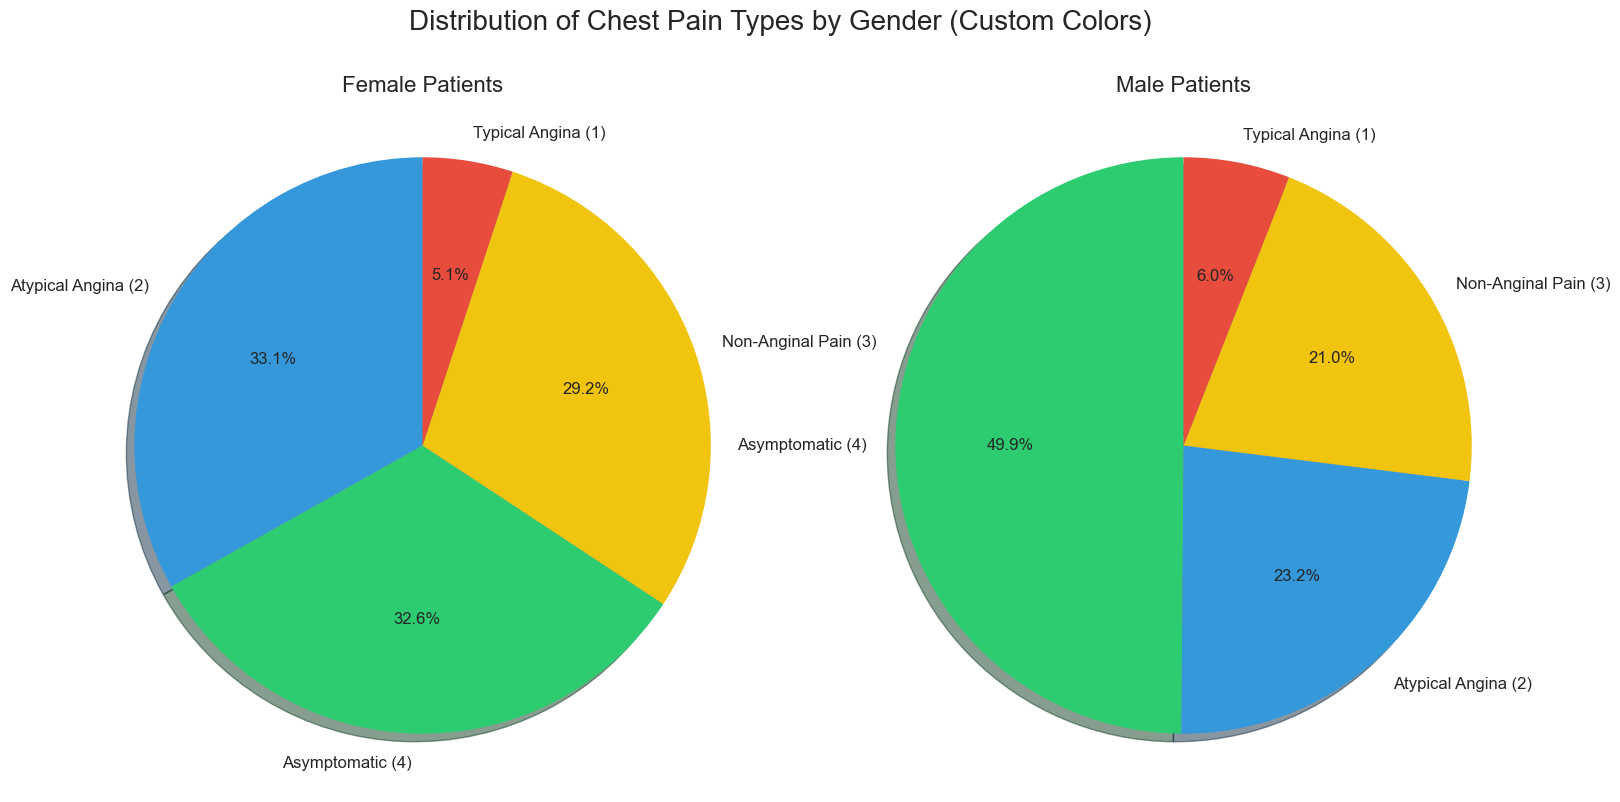

In [20]:
cp_map = {
    1: 'Typical Angina (1)',
    2: 'Atypical Angina (2)',
    3: 'Non-Anginal Pain (3)',
    4: 'Asymptomatic (4)'
}
df['chest_pain_label'] = df['chest pain'].map(cp_map)

color_map = {
    'Typical Angina (1)': '#e74c3c',       
    'Atypical Angina (2)': '#3498db', 
    'Non-Anginal Pain (3)': '#f1c40f',    
    'Asymptomatic (4)': '#2ecc71'     
}

male_df = df[df['sex'] == 1]
female_df = df[df['sex'] == 0]

male_counts = male_df['chest_pain_label'].value_counts()
female_counts = female_df['chest_pain_label'].value_counts()

male_colors = [color_map[label] for label in male_counts.index]
female_colors = [color_map[label] for label in female_counts.index]

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 9))
fig.suptitle('Distribution of Chest Pain Types by Gender (Custom Colors)', fontsize=20)

ax1.pie(
    female_counts,
    labels = female_counts.index,
    autopct = '%1.1f%%',
    startangle = 90,
    colors = female_colors, 
    shadow = True,
    textprops = {'fontsize' : 12}
)
ax1.set_title('Female Patients', fontsize=16)
ax1.axis('equal')

ax2.pie(
    male_counts,
    labels = male_counts.index,
    autopct = '%1.1f%%',
    startangle = 90,
    colors = male_colors, 
    shadow = True,
    textprops = {'fontsize' : 12}
)
ax2.set_title('Male Patients', fontsize = 16)
ax2.axis('equal')

### Delete Useless Features Created by EDA

In [21]:
df = df.drop(['has_high_cholesterol',
              'has_high_bp',
              'high_risk_combo',
              'age_group', 
              'sex_label', 
              'exercise_angina_label', 
              'chest_pain_label'], axis=1)

# <font color=#4d4dff>Preprocessing</font>

## Data renaming

In [22]:
df.rename(columns = {"Age (age in year)" : "Age",
                     "cholestoral " : "cholestoral",
                     "depression " : "depression",
                     "electrocardiographic " : "electrocardiographic"},
                      inplace = True)
df

Age  sex  chest pain  blood pressure  cholestoral  blood sugar  \
0     63    1           1           145.0        233.0          1.0   
1     37    1           3           130.0        250.0          0.0   
2     41    0           2           130.0        204.0          0.0   
3     56    1           2           120.0        236.0          0.0   
4     57    0           4           120.0        354.0          0.0   
..   ...  ...         ...             ...          ...          ...   
592   52    1           4           140.0        266.0          0.0   
593   43    1           4           140.0        288.0          0.0   
594   41    1           4           120.0        336.0          0.0   
595   44    1           4           135.0        491.0          0.0   
596   49    1           4           150.0        222.0          0.0   

     electrocardiographic  heart rate  exercise induced  depression  slope  \
0                     2.0       150.0               0.0         2.3    3.0   
1                     0.0       187.0               0.0         3.5    3.0   
2                     2.0       172.0               0.0         1.4    1.0   
3                     0.0       178.0               0.0         0.8    1.0   
4                     0.0       163.0               1.0         0.6    1.0   
..                    ...         ...               ...         ...    ...   
592                   0.0       134.0               1.0         2.0    2.0   
593                   0.0       135.0               1.0         2.0    2.0   
594                   0.0       118.0               1.0         3.0    2.0   
595                   0.0       135.0               0.0         0.0    NaN   
596                   0.0       122.0               0.0         2.0    2.0   

      ca  thal  c  
0    0.0   6.0  0  
1    0.0   3.0  0  
2    0.0   3.0  0  
3    0.0   3.0  0  
4    0.0   3.0  0  
..   ...   ... ..  
592  NaN   NaN  1  
593  NaN   NaN  1  
594  NaN   NaN  1  
595  NaN   NaN  1  
596  NaN   NaN  1  

[597 rows x 14 columns]

## Outlier handeling

### Boxplot -> Detect

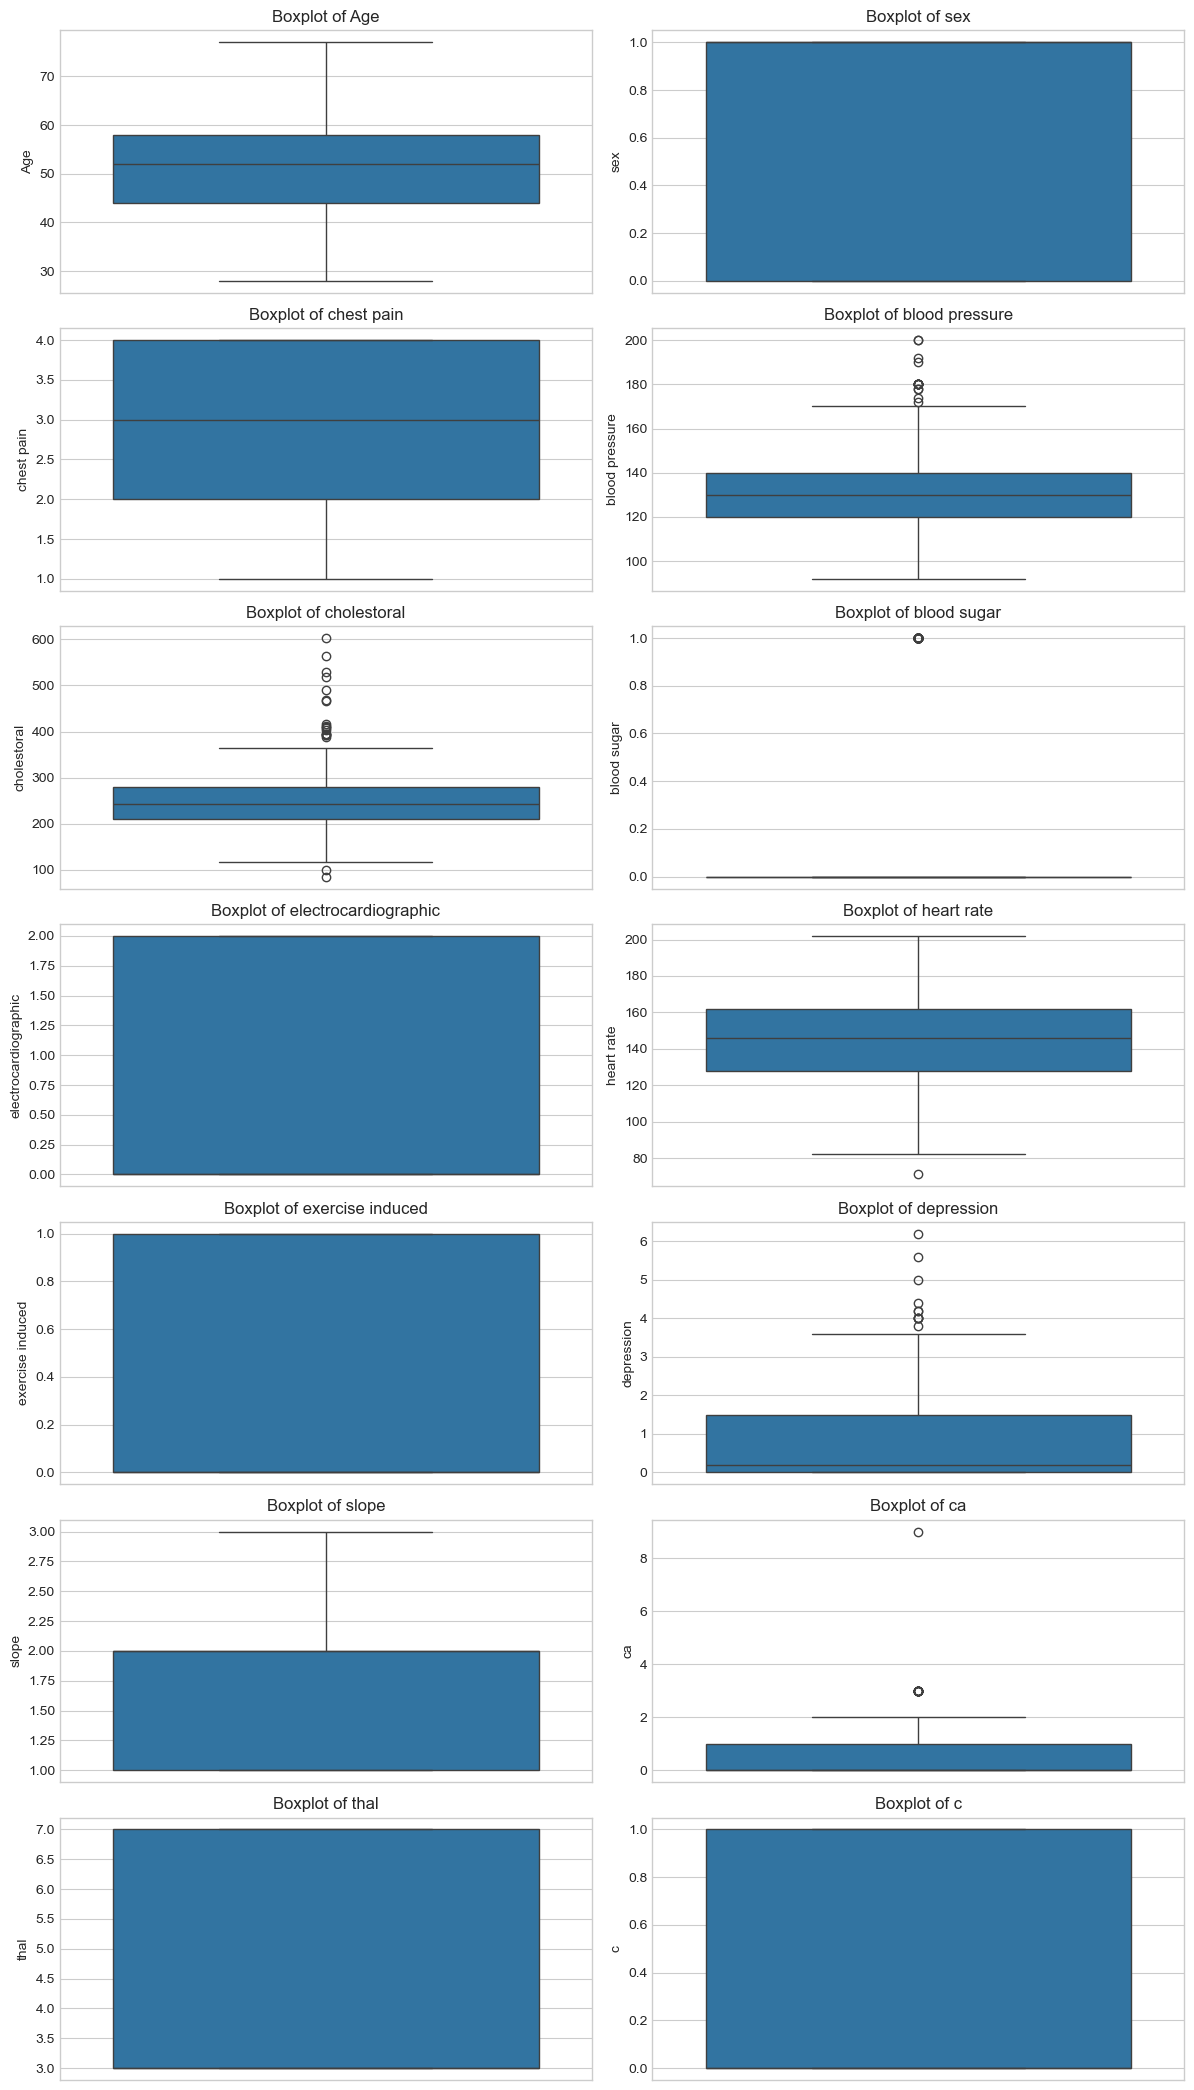

In [23]:
columns = df.select_dtypes(include='number').columns

n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))

axes = np.ravel(axes)

for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

### Histogram -> Detect

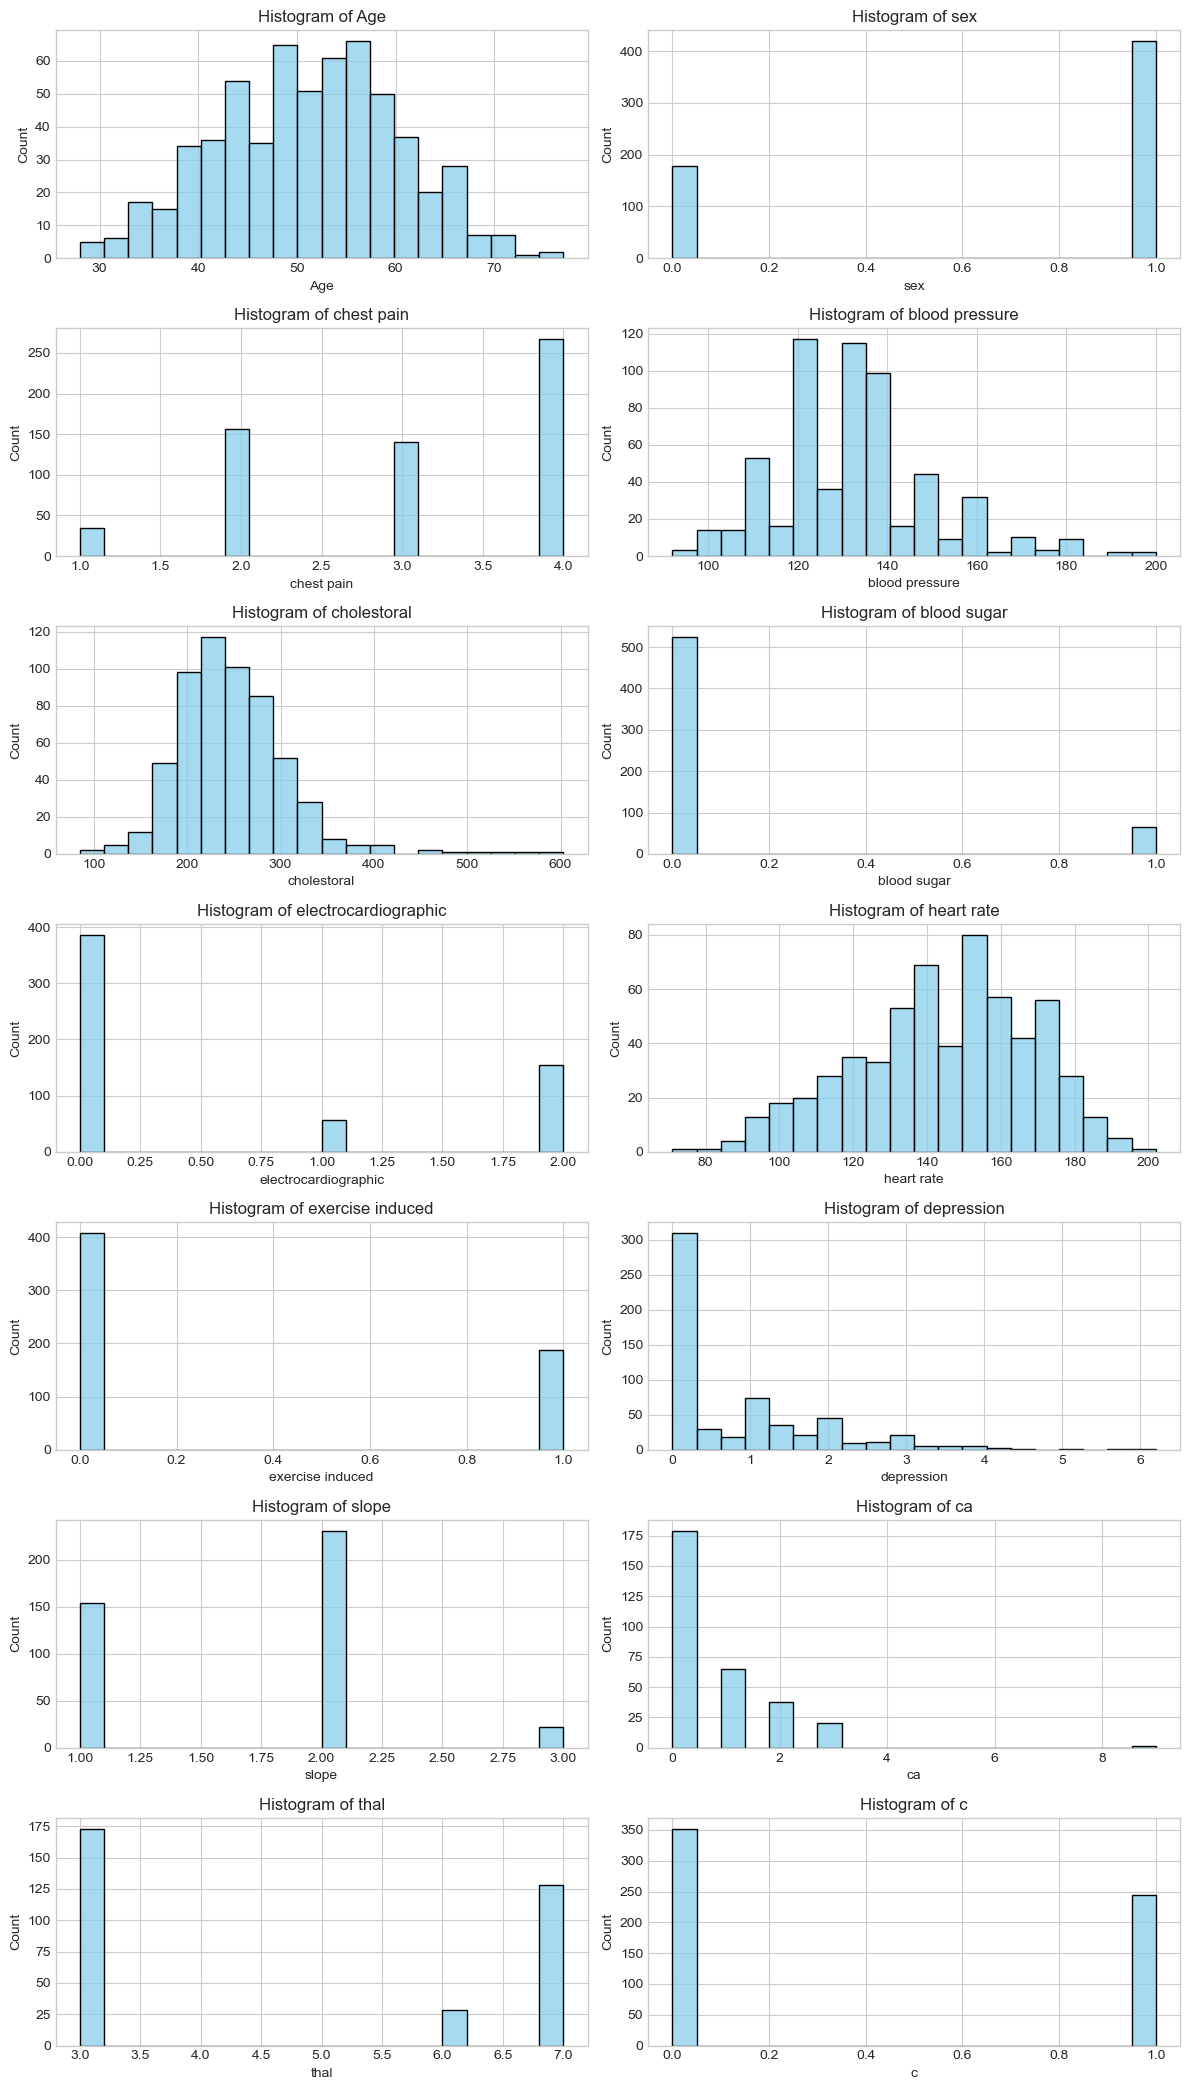

In [24]:
columns = df.select_dtypes(include='number').columns  

n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = np.ravel(axes)  

for i, col in enumerate(columns):
    sns.histplot(df[col], bins=20, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Histogram of {col}")

for j in range(len(columns), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

### Distribution -> Detect

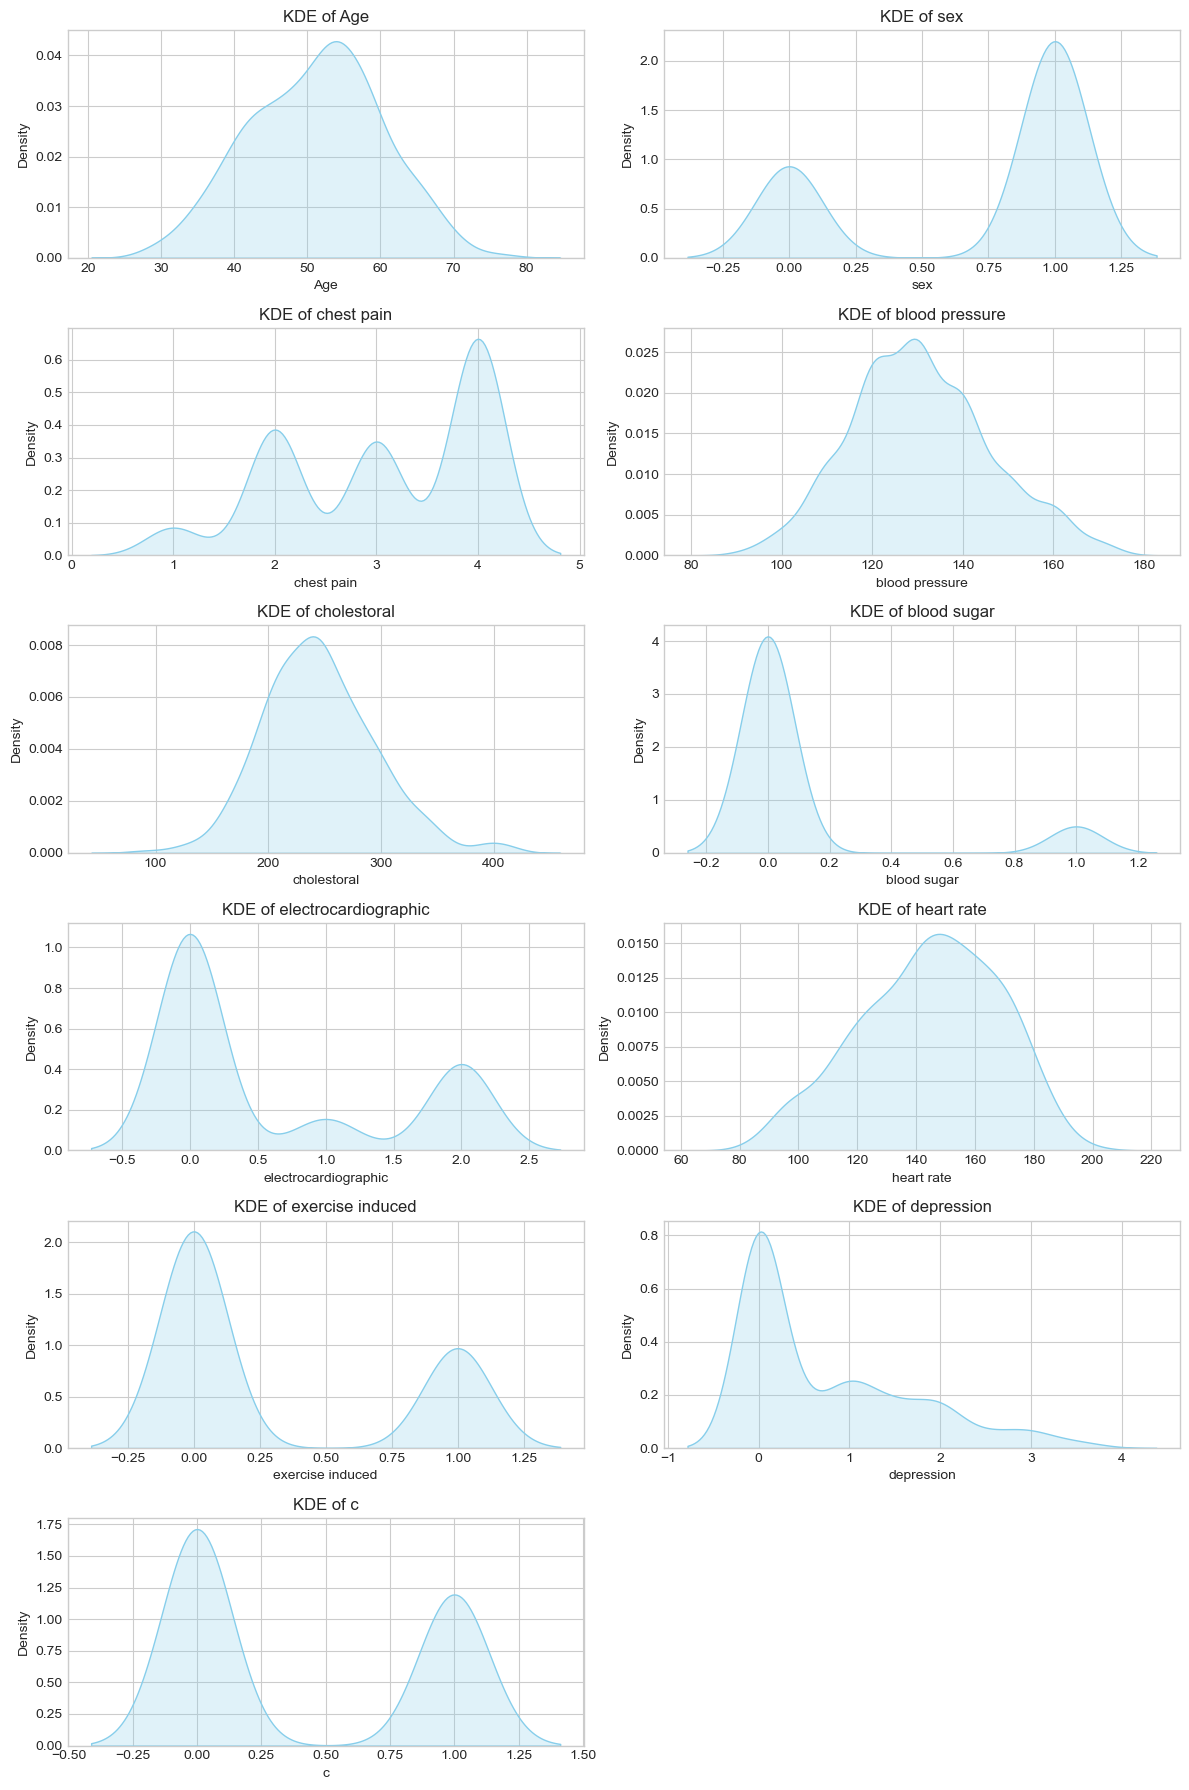

In [60]:
columns = df.select_dtypes(include='number').columns  

n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = np.ravel(axes)  

for i, col in enumerate(columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color="skyblue")  
    axes[i].set_title(f"KDE of {col}")
    axes[i].set_xlabel(col)

for j in range(len(columns), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

### Cheking Outlier for Cholestoral, Blood Pressure, Depression

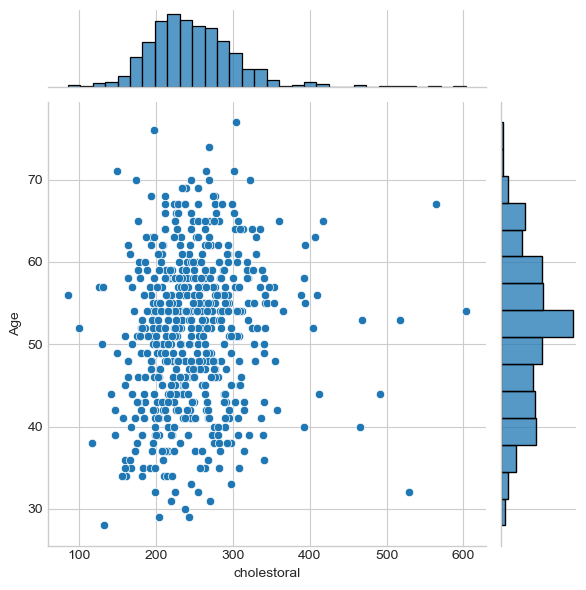

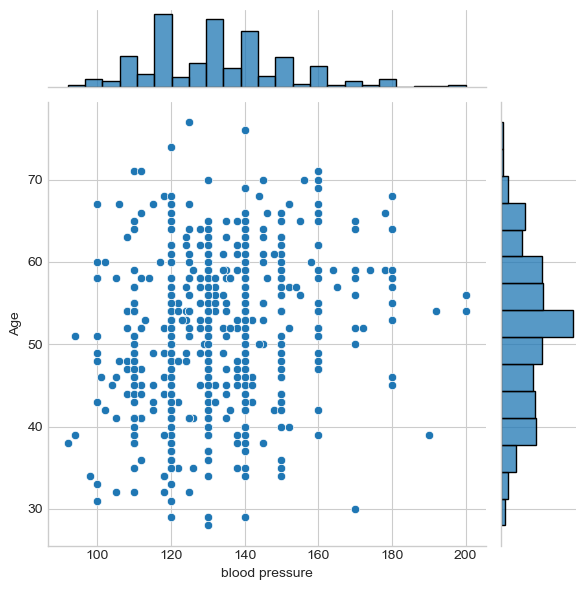

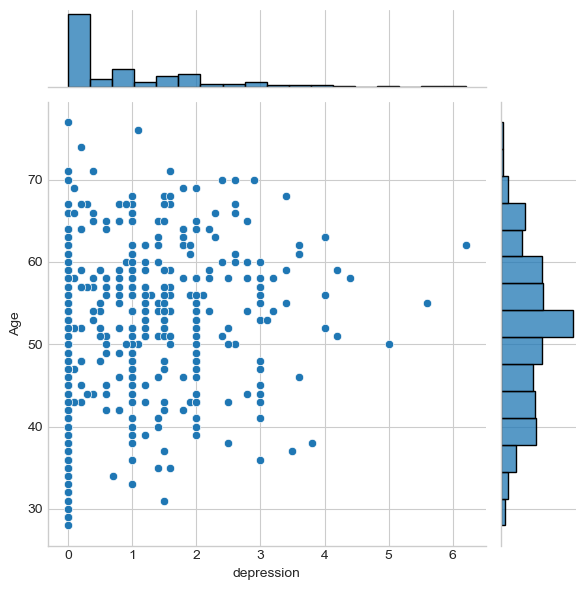

In [26]:
df_cols = ["cholestoral", "blood pressure", "depression"]

for col in df_cols:
    sns.jointplot(x = df[col], y = df["Age"], kind = "scatter")
    
plt.show()

### IQR noise and outlier detection

In [27]:
out = []

def iqr_outlier(entry):
    q1 = entry.quantile(0.25)
    q3 = entry.quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    for i in entry:
        if i > upper_tail or i < lower_tail:
            out.append(i)

outlier_features = ["cholestoral", "blood pressure", "depression"]

for j in outlier_features:
    iqr_outlier(df[j])
    print(f"{j} Outliers:", out, end = '\n\n')

cholestoral Outliers: [417.0, 564.0, 394.0, 468.0, 412.0, 100.0, 85.0, 394.0, 466.0, 409.0, 529.0, 392.0, 603.0, 518.0, 388.0, 404.0, 407.0, 393.0, 491.0]

blood pressure Outliers: [417.0, 564.0, 394.0, 468.0, 412.0, 100.0, 85.0, 394.0, 466.0, 409.0, 529.0, 392.0, 603.0, 518.0, 388.0, 404.0, 407.0, 393.0, 491.0, 172.0, 178.0, 180.0, 190.0, 180.0, 180.0, 180.0, 180.0, 174.0, 192.0, 180.0, 200.0, 180.0, 200.0, 178.0, 180.0, 180.0]

depression Outliers: [417.0, 564.0, 394.0, 468.0, 412.0, 100.0, 85.0, 394.0, 466.0, 409.0, 529.0, 392.0, 603.0, 518.0, 388.0, 404.0, 407.0, 393.0, 491.0, 172.0, 178.0, 180.0, 190.0, 180.0, 180.0, 180.0, 180.0, 174.0, 192.0, 180.0, 200.0, 180.0, 200.0, 178.0, 180.0, 180.0, 4.2, 4.0, 6.2, 5.6, 4.0, 4.2, 4.0, 4.0, 3.8, 4.4, 5.0]



### Z-score noise and outlier detection

In [28]:
df_outliers = df[["cholestoral", "blood pressure", "depression"]]
outlier_features = ["cholestoral", "blood pressure", "depression"]

def zscore_outliers(entry):
    lower = entry.mean() - 3 * entry.std()
    upper = entry.mean() + 3 * entry.std()
    out = entry[(entry < lower) | (entry > upper)].tolist()  
    return out

for j in outlier_features:
    out = zscore_outliers(df_outliers[j])
    print(f"{j} Outliers:", out, end='\n\n')

cholestoral Outliers: [564.0, 468.0, 466.0, 529.0, 603.0, 518.0, 491.0]

blood pressure Outliers: [190.0, 192.0, 200.0, 200.0]

depression Outliers: [4.2, 6.2, 5.6, 4.2, 4.4, 5.0]



### Modified Z-score noise and outlier detection

* Cause using NumPy & Statsmodel & Median, We need to handle the missings

In [29]:
df.head()

Age  sex  chest pain  blood pressure  cholestoral  blood sugar  \
0   63    1           1           145.0        233.0          1.0   
1   37    1           3           130.0        250.0          0.0   
2   41    0           2           130.0        204.0          0.0   
3   56    1           2           120.0        236.0          0.0   
4   57    0           4           120.0        354.0          0.0   

   electrocardiographic  heart rate  exercise induced  depression  slope   ca  \
0                   2.0       150.0               0.0         2.3    3.0  0.0   
1                   0.0       187.0               0.0         3.5    3.0  0.0   
2                   2.0       172.0               0.0         1.4    1.0  0.0   
3                   0.0       178.0               0.0         0.8    1.0  0.0   
4                   0.0       163.0               1.0         0.6    1.0  0.0   

   thal  c  
0   6.0  0  
1   3.0  0  
2   3.0  0  
3   3.0  0  
4   3.0  0

In [30]:
df.isnull().sum()

Age                       0
sex                       0
chest pain                0
blood pressure            1
cholestoral              23
blood sugar               8
electrocardiographic      1
heart rate                1
exercise induced          1
depression                0
slope                   190
ca                      294
thal                    268
c                         0
dtype: int64

In [31]:
df_nomiss = df.copy()

columns = ["blood pressure", "cholestoral", "blood sugar", "electrocardiographic", "heart rate", "exercise induced"]

for col in columns:
    if col in df_nomiss.columns:
        df_nomiss[col] = df_nomiss[col].fillna(df_nomiss[col].median())

In [32]:
df_nomiss.isnull().sum()

Age                       0
sex                       0
chest pain                0
blood pressure            0
cholestoral               0
blood sugar               0
electrocardiographic      0
heart rate                0
exercise induced          0
depression                0
slope                   190
ca                      294
thal                    268
c                         0
dtype: int64

In [33]:
def M_Zscore_outlier(series, threshold=3):
    med = np.median(series)
    ma = statsmodels.robust.mad(series)

    if ma == 0:
        return []

    z_scores = [(i - med) / ma for i in series]
    outliers = [val for val, z in zip(series, z_scores) if np.abs(z) > threshold]
    return outliers

outliers_dict = {}
columns = ["blood pressure", "cholestoral", "blood sugar", "heart rate", "depression"]

for col in columns:
    outliers_dict[col] = M_Zscore_outlier(df_nomiss[col])

# Tidy print
for col, outliers in outliers_dict.items():
    print(f"{col}: {outliers if outliers else 'No outliers'}")

blood pressure: [178.0, 180.0, 190.0, 180.0, 180.0, 180.0, 180.0, 192.0, 180.0, 200.0, 180.0, 200.0, 178.0, 180.0, 180.0]
cholestoral: [417.0, 564.0, 394.0, 468.0, 412.0, 85.0, 394.0, 466.0, 409.0, 529.0, 392.0, 603.0, 518.0, 388.0, 404.0, 407.0, 393.0, 491.0]
blood sugar: No outliers
heart rate: [71.0]
depression: [2.3, 3.5, 1.4, 1.3, 1.6, 1.2, 1.8, 1.6, 2.6, 1.5, 1.8, 1.4, 1.6, 1.2, 1.4, 1.4, 1.6, 1.5, 3.0, 1.8, 1.4, 1.2, 1.4, 2.4, 1.2, 1.6, 1.6, 1.2, 1.9, 4.2, 1.5, 1.1, 2.0, 1.9, 2.0, 1.5, 1.2, 1.1, 2.3, 1.6, 1.2, 1.5, 3.0, 1.5, 2.0, 2.0, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.6, 3.1, 1.8, 1.4, 2.2, 2.2, 3.0, 3.6, 1.8, 2.8, 1.2, 1.4, 1.6, 1.8, 2.4, 1.6, 1.2, 2.1, 1.4, 1.8, 2.0, 1.9, 1.2, 1.5, 3.0, 2.0, 1.5, 1.5, 1.5, 2.0, 2.0, 1.5, 2.5, 2.0, 3.0, 1.5, 1.4, 1.4, 1.2, 1.4, 2.8, 3.4, 1.2, 3.6, 3.0, 1.2, 2.8, 1.2, 1.9, 2.0, 1.9, 3.4, 1.6, 2.6, 1.8, 2.2, 1.8, 3.0, 2.8, 2.8, 4.0, 3.4, 2.0, 1.5, 1.5, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.5, 2.0, 1.5, 3.6, 3.2, 2.0, 2.5, 1.2, 1.6, 6.2, 2.6, 2.0, 1.2, 1.

### Winsoration noise and outlier detection

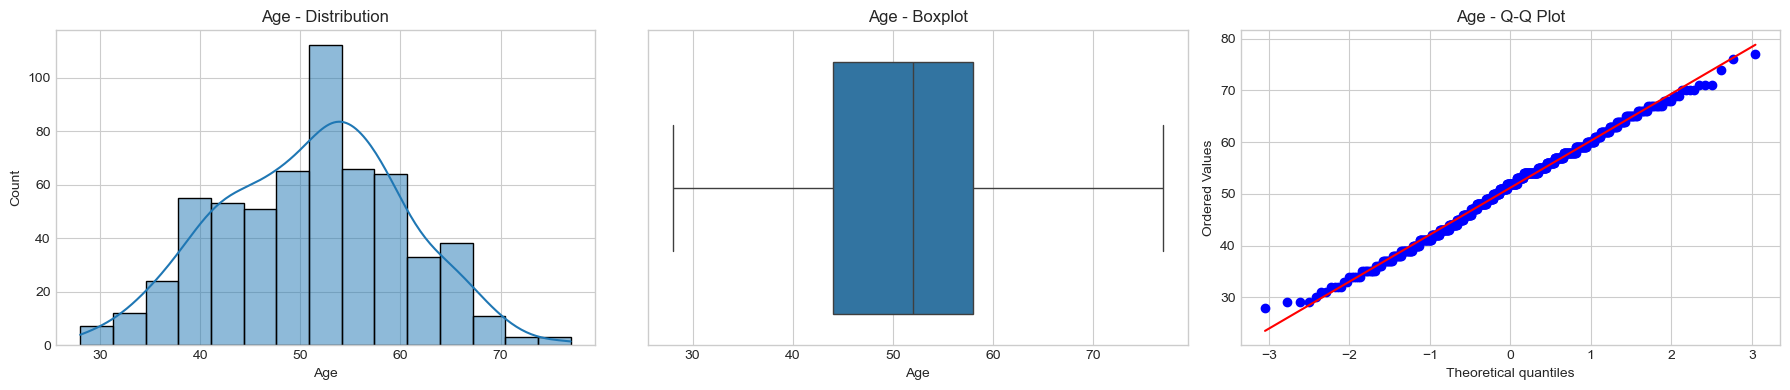

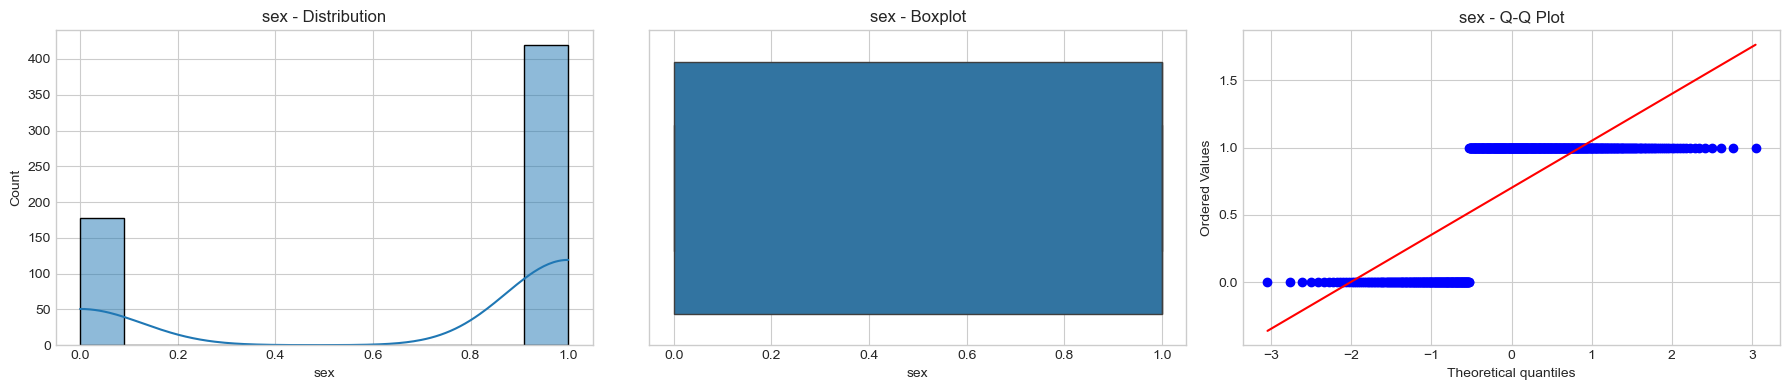

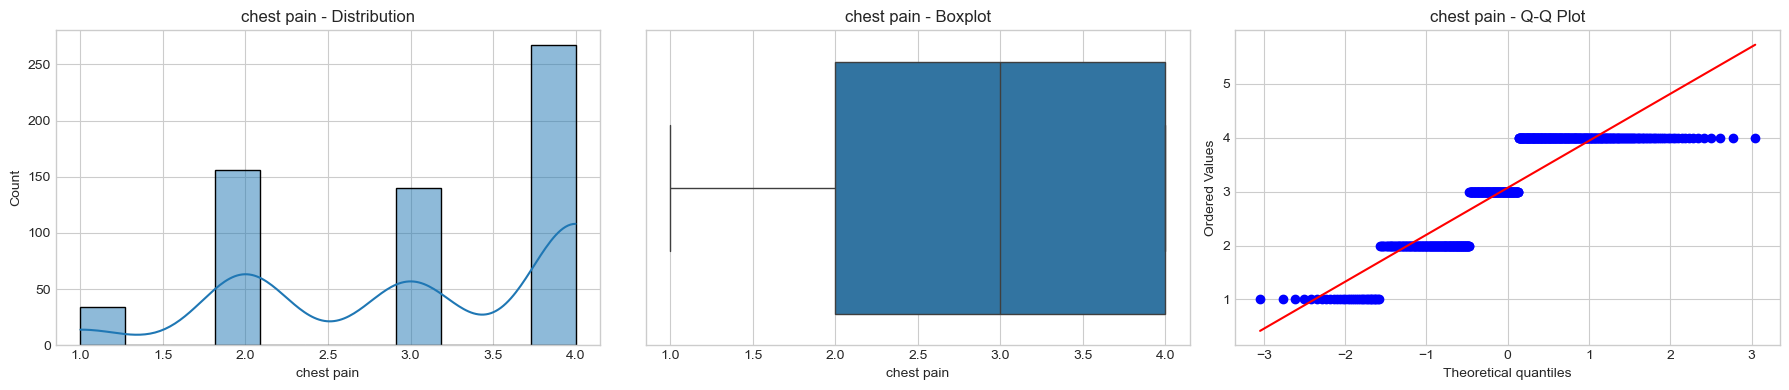

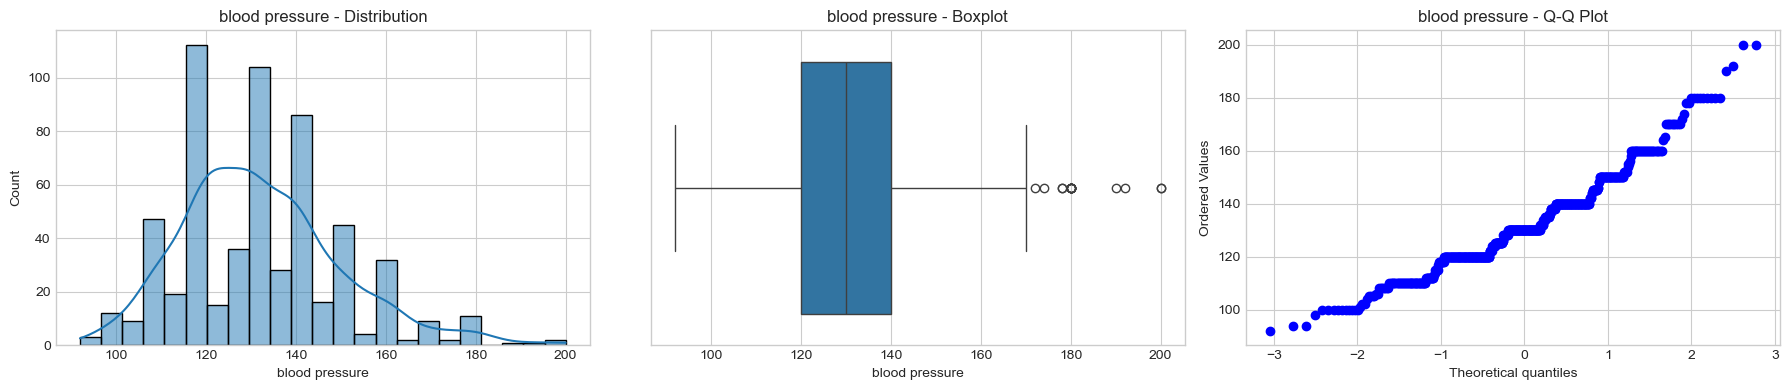

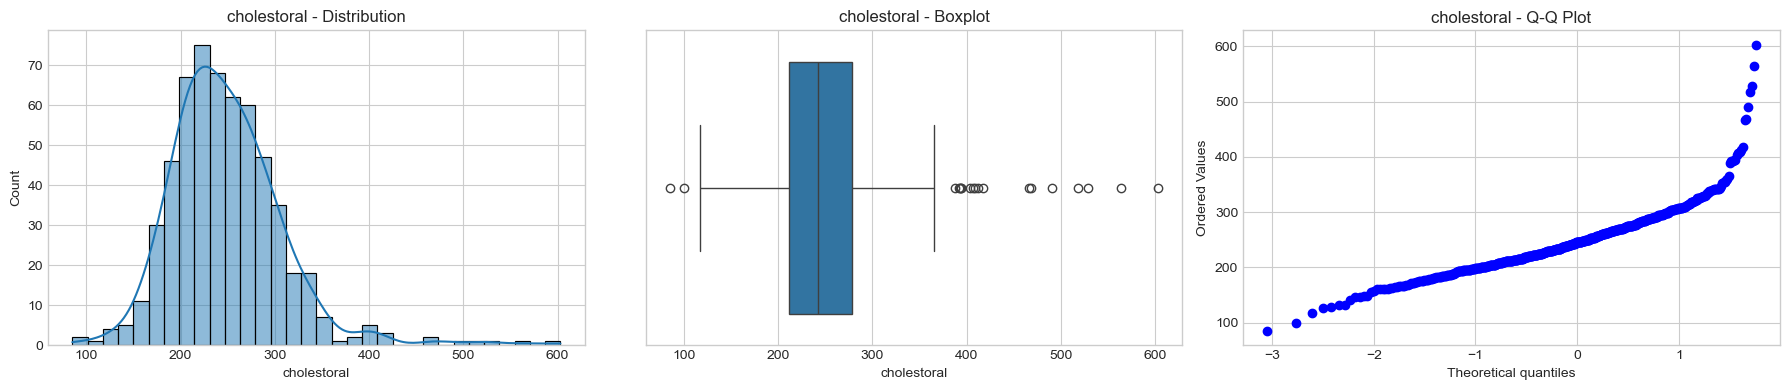

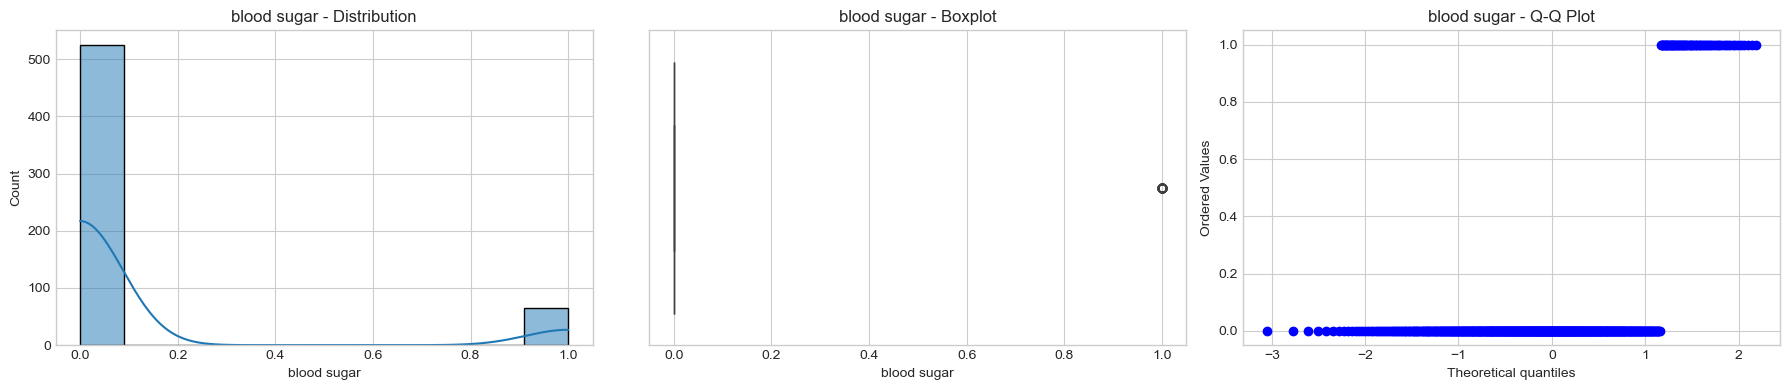

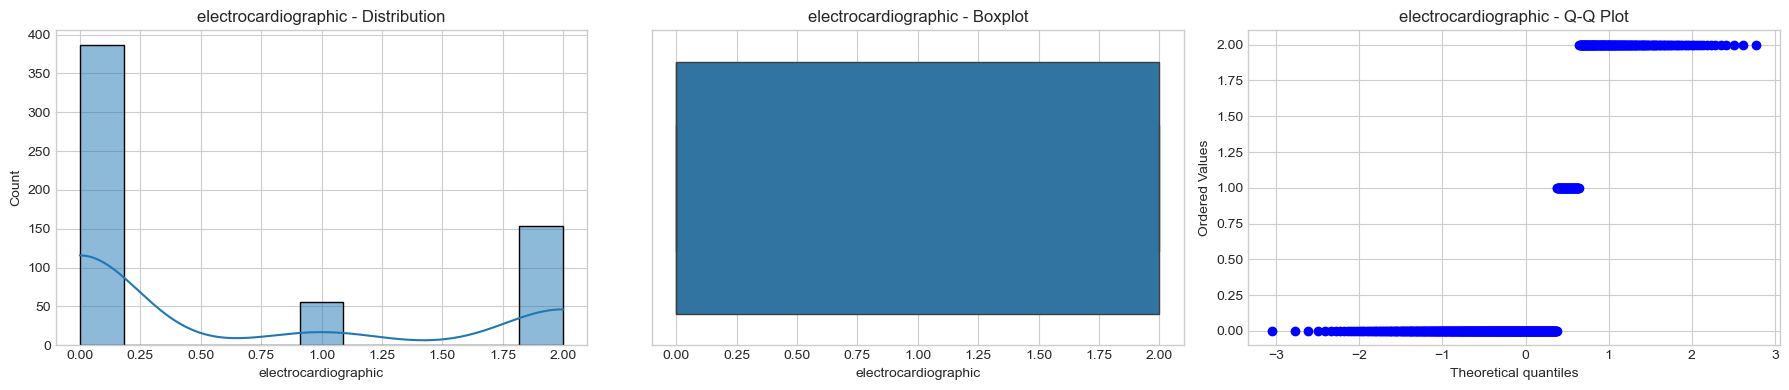

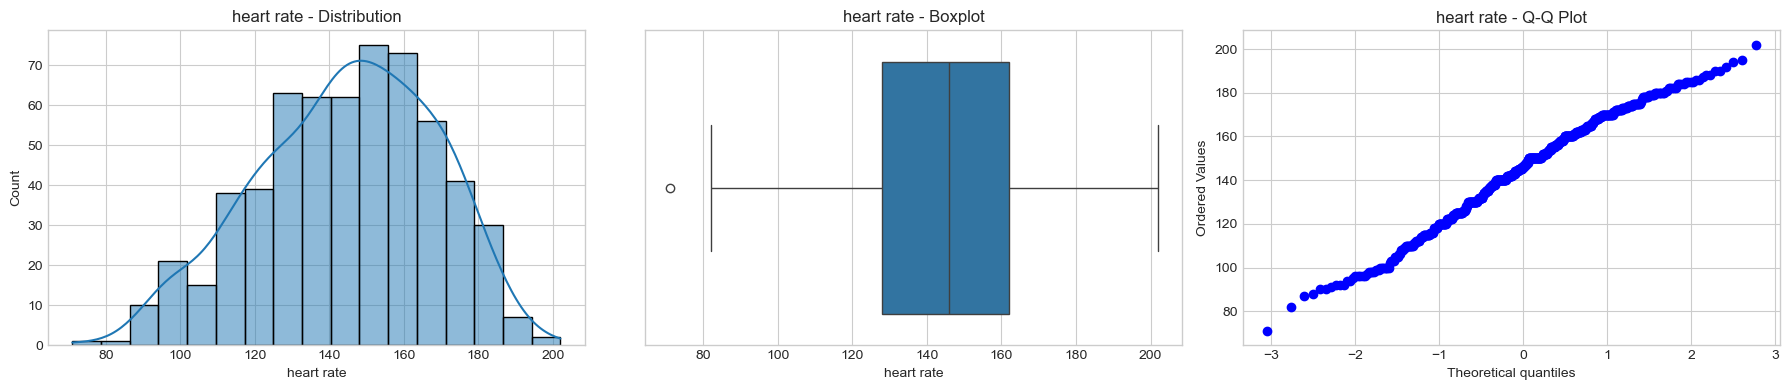

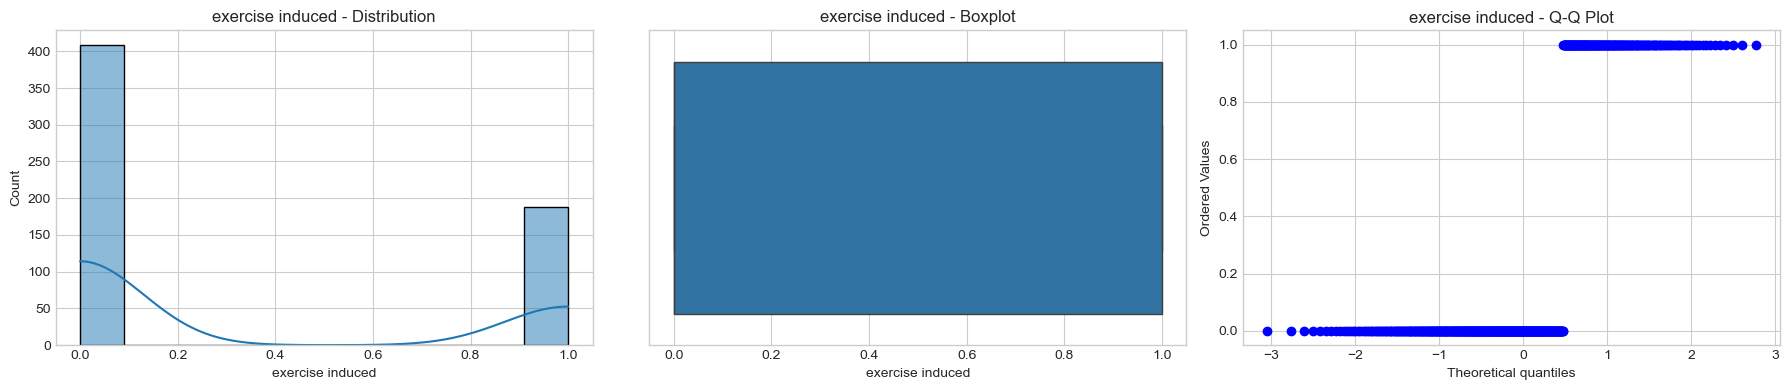

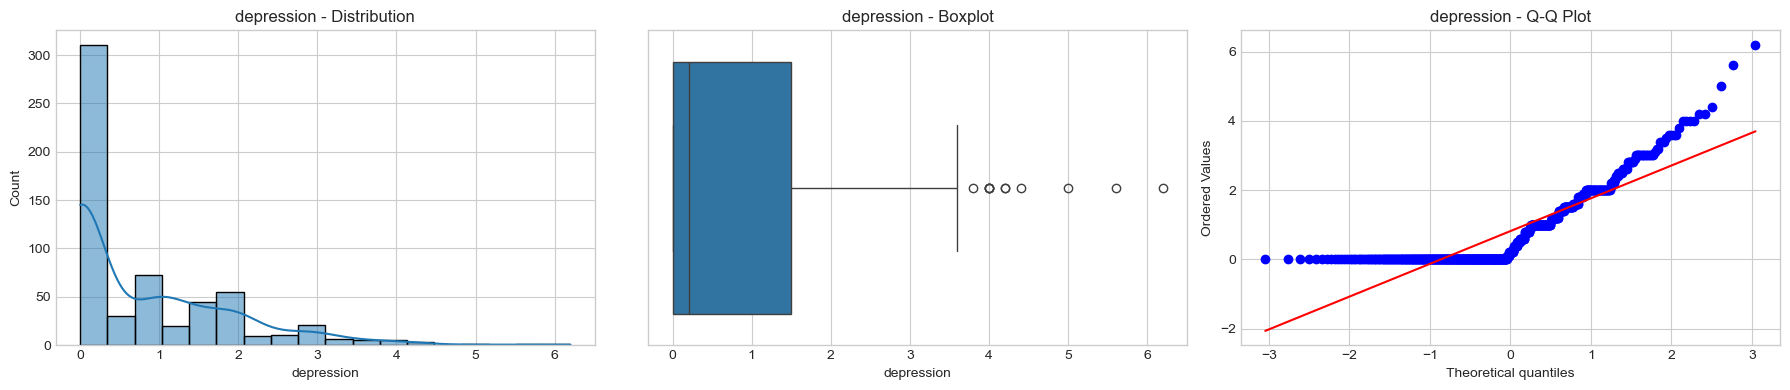

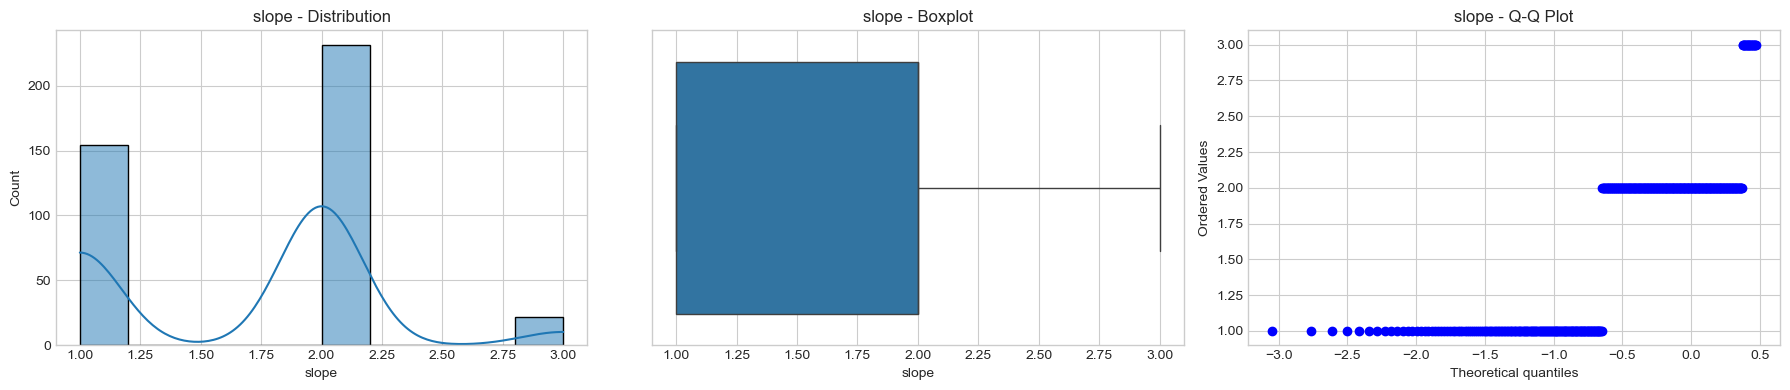

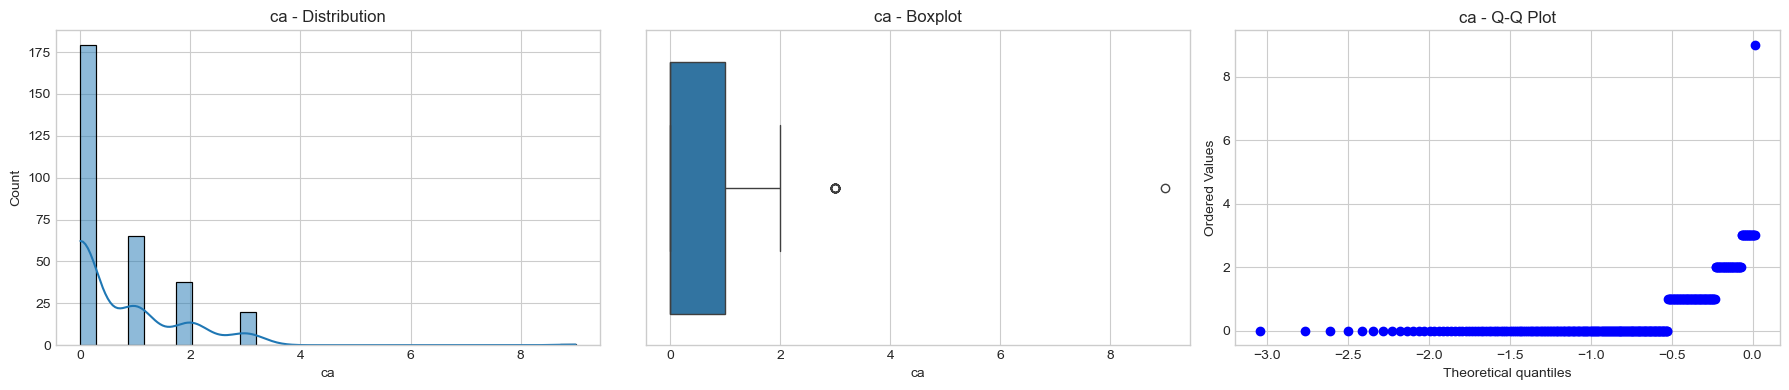

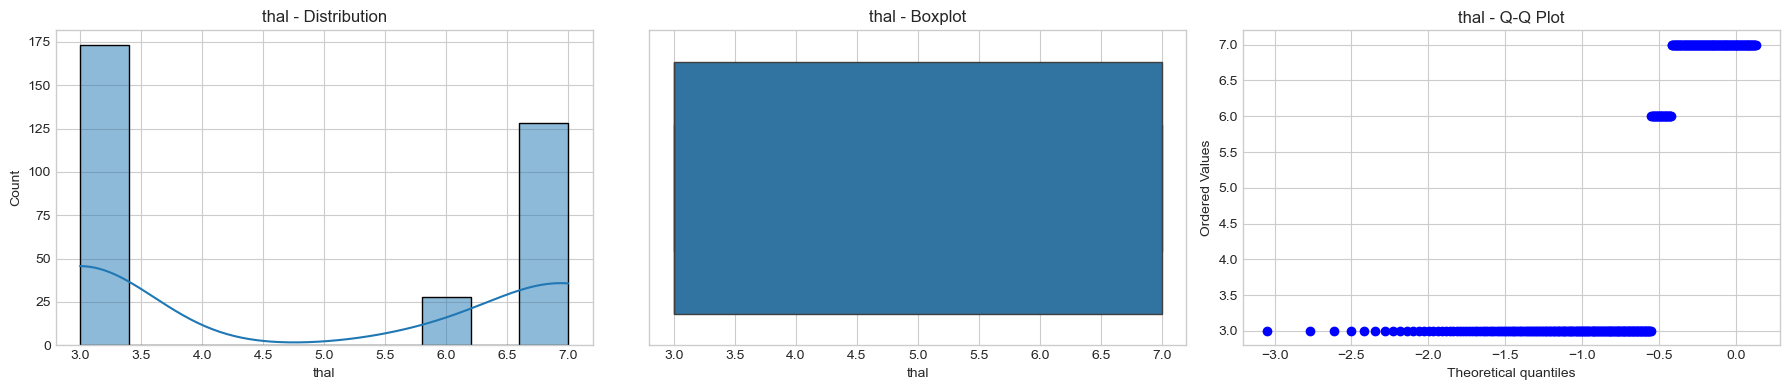

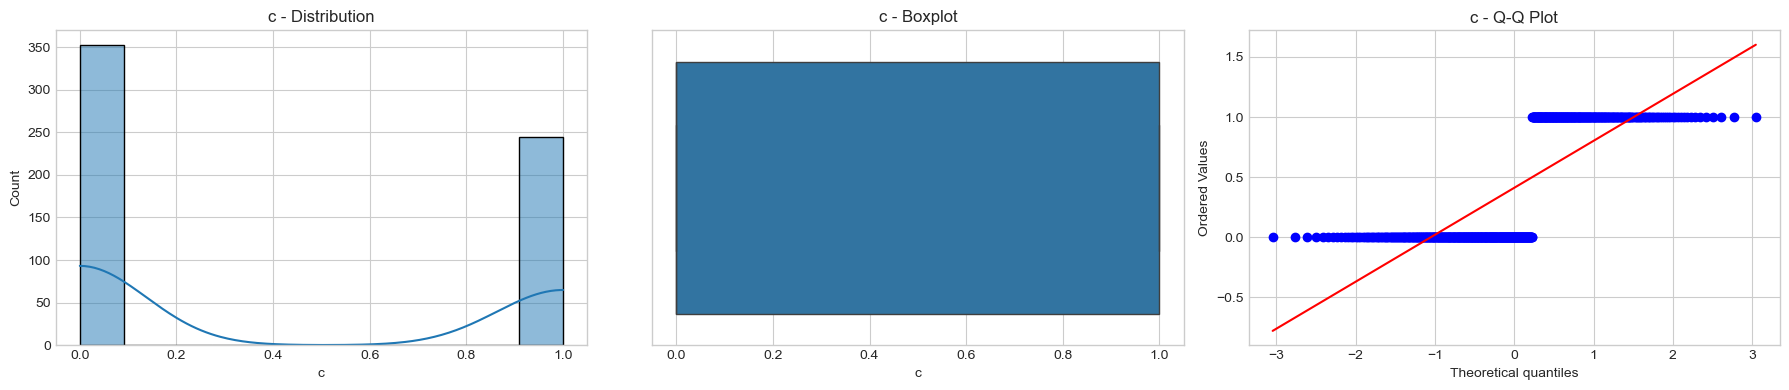

In [34]:
df_wins = df.copy() 

for col in df_wins.columns:
    plt.figure(figsize=(18, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(df_wins[col], kde=True)
    plt.title(f"{col} - Distribution")

    plt.subplot(1, 3, 2)
    sns.boxplot(x=df_wins[col])
    plt.title(f"{col} - Boxplot")

    plt.subplot(1, 3, 3)
    stats.probplot(df_wins[col], plot=plt)
    plt.title(f"{col} - Q-Q Plot")

    plt.tight_layout()
    plt.show()

### Last Outlier and Noise Handling

#### Handle Normal Distribution Outlier and Noise For df1

In [35]:
zscore_features = ["heart rate", "cholestoral"]

for col in zscore_features:
    mean = df[col].mean()
    std = df[col].std()
    lower = mean - 3 * std
    upper = mean + 3 * std
    median = df[col].median()

    df[col] = df[col].apply(lambda x: median if (x < lower or x > upper) else x)

#### Handle UnNormal Distribution Outlier and Noise For df1

In [36]:
iqr_features = ["depression", "blood pressure"]

for col in iqr_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    median = df[col].median()

    df[col] = df[col].apply(lambda x: median if (x < lower or x > upper) else x)

### Result

* depression and blood pressure detected by iqr cause of unnormal distributition and they got handled by median
* heart rate and cholestoral detected by zscore cause of normal distribuition and they got handled by median

In [37]:
print(df[["heart rate", "cholestoral", "depression", "blood pressure"]].describe())

       heart rate  cholestoral  depression  blood pressure
count  596.000000   574.000000  597.000000      596.000000
mean   144.582215   245.272648    0.737186      130.629195
std     23.602698    51.360259    0.939097       15.273476
min     82.000000    85.000000    0.000000       92.000000
25%    128.000000   211.000000    0.000000      120.000000
50%    146.000000   242.250000    0.200000      130.000000
75%    162.000000   276.000000    1.400000      140.000000
max    202.000000   417.000000    3.600000      170.000000


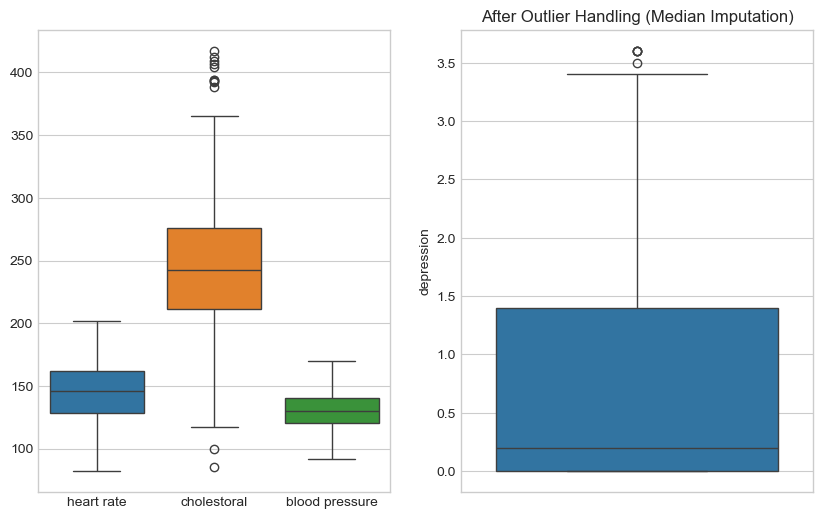

In [38]:
features = ["heart rate", "cholestoral", "blood pressure"]
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
sns.boxplot(data = df[features])

plt.subplot(1,2,2)
sns.boxplot(data = df["depression"])
plt.title("After Outlier Handling (Median Imputation)")
plt.show()

## Missing Data Handeling

### Total view of nulls

In [39]:
df.isnull().sum()

Age                       0
sex                       0
chest pain                0
blood pressure            1
cholestoral              23
blood sugar               8
electrocardiographic      1
heart rate                1
exercise induced          1
depression                0
slope                   190
ca                      294
thal                    268
c                         0
dtype: int64

### Delete features with so many missings

* These features got so many missing data roughly 32% to 49% and its better to delete this feature in this type of dataset with only 600 record

In [40]:
df_na = df.dropna(thresh = 450 , axis = 1)
print(df.shape, df_na.shape)
df = df_na
print(df.shape)

(597, 14) (597, 11)
(597, 11)


### Frequnency of each feature

In [41]:
columns = df.columns

for col in columns:
    print(df[col].value_counts(dropna = False))

Age
54    41
52    30
58    28
48    26
55    23
57    22
59    22
41    21
56    21
51    21
43    20
53    20
46    20
49    20
50    19
44    18
45    16
42    15
47    15
39    15
60    14
62    13
65    11
63    10
37    10
40    10
61    10
64    10
35     9
67     9
38     9
66     8
34     6
36     5
70     4
32     4
68     4
71     3
29     3
69     3
31     2
33     2
76     1
74     1
28     1
30     1
77     1
Name: count, dtype: int64
sex
1    419
0    178
Name: count, dtype: int64
chest pain
4    267
2    156
3    140
1     34
Name: count, dtype: int64
blood pressure
130.0    107
120.0    102
140.0     82
150.0     40
110.0     40
160.0     31
125.0     19
128.0     13
138.0     13
112.0     12
135.0     11
100.0     10
145.0     10
118.0      9
170.0      9
132.0      9
124.0      8
108.0      7
122.0      6
134.0      5
115.0      5
152.0      5
136.0      4
142.0      4
105.0      4
126.0      3
146.0      2
144.0      2
106.0      2
102.0      2
94.0       2
155.0   

### Index of null values

In [42]:
columns = df.columns
for col in columns:
    null_values = df[col].isnull()
    if null_values.any():  
        print(f"Null values in column: {col}")
        print(df.loc[null_values, col])
        print()

Null values in column: blood pressure
347   NaN
Name: blood pressure, dtype: float64

Null values in column: cholestoral
166   NaN
185   NaN
189   NaN
204   NaN
221   NaN
251   NaN
257   NaN
258   NaN
262   NaN
265   NaN
267   NaN
272   NaN
286   NaN
305   NaN
332   NaN
336   NaN
345   NaN
346   NaN
490   NaN
492   NaN
505   NaN
550   NaN
566   NaN
Name: cholestoral, dtype: float64

Null values in column: blood sugar
183   NaN
213   NaN
289   NaN
301   NaN
314   NaN
316   NaN
421   NaN
431   NaN
Name: blood sugar, dtype: float64

Null values in column: electrocardiographic
562   NaN
Name: electrocardiographic, dtype: float64

Null values in column: heart rate
347   NaN
Name: heart rate, dtype: float64

Null values in column: exercise induced
347   NaN
Name: exercise induced, dtype: float64



### handle other features

In [43]:
columns = ["heart rate", "blood pressure", "cholestoral"]

for col in columns:
    df.loc[:, col] = df[col].fillna(df[col].mean())

In [44]:
columns = ["blood sugar", "electrocardiographic", "exercise induced"]

for col in columns:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

In [45]:
df.isnull().sum()

Age                     0
sex                     0
chest pain              0
blood pressure          0
cholestoral             0
blood sugar             0
electrocardiographic    0
heart rate              0
exercise induced        0
depression              0
c                       0
dtype: int64

## Label encoding

* All of the features are quantitative and we dont need to label encode anyting

## Normalization

In [46]:
"""from sklearn.preprocessing import MinMaxScaler

float_features = ['Age', 'chest pain', 'blood pressure', 'cholestoral', 'heart rate', 'depression', 'electrocardiographic']

sc = MinMaxScaler()
df_scaled = df.copy()

df_scaled[float_features] = sc.fit_transform(df[float_features])

df = df_scaled"""

# we need to normalize after train and test seprating!!!

"from sklearn.preprocessing import MinMaxScaler\n\nfloat_features = ['Age', 'chest pain', 'blood pressure', 'cholestoral', 'heart rate', 'depression', 'electrocardiographic']\n\nsc = MinMaxScaler()\ndf_scaled = df.copy()\n\ndf_scaled[float_features] = sc.fit_transform(df[float_features])\n\ndf = df_scaled"

In [47]:
df.head(5)

Age  sex  chest pain  blood pressure  cholestoral  blood sugar  \
0   63    1           1           145.0        233.0          1.0   
1   37    1           3           130.0        250.0          0.0   
2   41    0           2           130.0        204.0          0.0   
3   56    1           2           120.0        236.0          0.0   
4   57    0           4           120.0        354.0          0.0   

   electrocardiographic  heart rate  exercise induced  depression  c  
0                   2.0       150.0               0.0         2.3  0  
1                   0.0       187.0               0.0         3.5  0  
2                   2.0       172.0               0.0         1.4  0  
3                   0.0       178.0               0.0         0.8  0  
4                   0.0       163.0               1.0         0.6  0

## Detecting Duplicated Data

In [48]:
df_nodup = df[df.duplicated(keep = False)]
df_nodup

Age  sex  chest pain  blood pressure  cholestoral  blood sugar  \
221   49    0           2           110.0   245.272648          0.0   
265   49    0           2           110.0   245.272648          0.0   

     electrocardiographic  heart rate  exercise induced  depression  c  
221                   0.0       160.0               0.0         0.0  0  
265                   0.0       160.0               0.0         0.0  0

In [49]:
df_dup = df.drop_duplicates()
print(df.shape, df_dup.shape)
df = df_dup

(597, 11) (596, 11)


# <font color=#4d4dff>Modeling</font>

## Decision Tree - Modeling - Optimization - Evaluation

Best Parameters:

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

0.7793640350877193
Accuracy on Test Data: 0.8083333333333333
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        71
           1       0.76      0.78      0.77        49

    accuracy                           0.81       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.81      0.81      0.81       120

Best CV Accuracy (5-Fold): 0.7793640350877193
Train Accuracy: 0.8130252100840336
Test Accuracy: 0.8083333333333333


C:\Users\Pooria\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


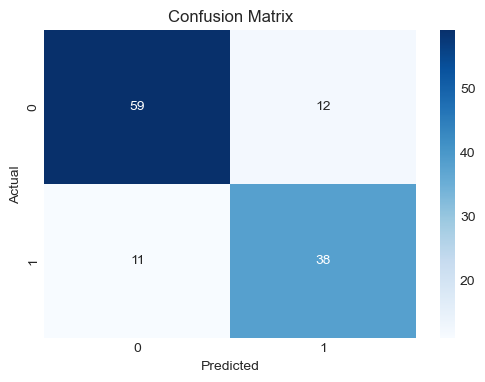

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("c", axis = 1)   
y = df["c"]                

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 369, stratify = y)

float_features = ['Age', 'chest pain', 'blood pressure', 'cholestoral',
                  'heart rate', 'depression', 'electrocardiographic']

DecisionTreeModel = DecisionTreeClassifier(random_state = 369, class_weight='balanced')

param_grid_dt = {
    'criterion':['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 4, 5, 6],
    'min_samples_leaf':[2, 3 ,4]
}

grid_search_dt = GridSearchCV(
    estimator = DecisionTreeModel,
    param_grid = param_grid_dt,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
)

grid_search_dt.fit(X_train, y_train)

print("Best Parameters:", grid_search_dt.best_params_, grid_search_dt.best_score_, sep = "\n\n")

y_pred = grid_search_dt.predict(X_test)

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_acc_dt = grid_search_dt.score(X_train, y_train)
test_acc_dt = grid_search_dt.score(X_test, y_test)

print("Best CV Accuracy (5-Fold):", grid_search_dt.best_score_)
print("Train Accuracy:", train_acc_dt)
print("Test Accuracy:", test_acc_dt)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## KNN - Modeling - Optimization - Evaluation

Fitting 5 folds for each of 104 candidates, totalling 520 fits
Best Parameters:
{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.7878728070175439
Accuracy on Test Data: 0.8083333333333333
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        71
           1       0.82      0.67      0.74        49

    accuracy                           0.81       120
   macro avg       0.81      0.79      0.79       120
weighted avg       0.81      0.81      0.80       120

Train Accuracy: 0.8172268907563025
Test Accuracy: 0.8083333333333333


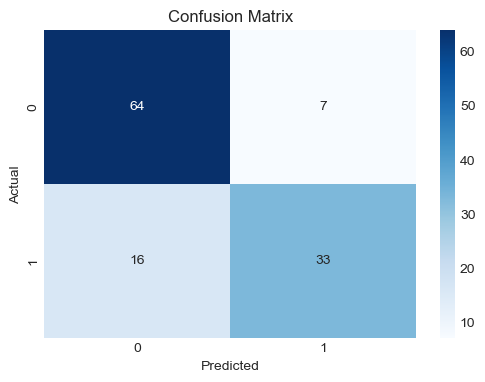

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')


X = df.drop("c", axis=1)
y = df["c"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 369, stratify = y)

float_features = ['Age', 'chest pain', 'blood pressure', 'cholestoral',
                  'heart rate', 'depression', 'electrocardiographic']

sc = MinMaxScaler()

X_train[float_features] = sc.fit_transform(X_train[float_features])
X_test[float_features] = sc.transform(X_test[float_features])

KnnModel = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': list(range(2, 15)), 
    'weights': ['uniform'],
    'metric': ['euclidean', 'manhattan'], 
    'p': [1, 2],
    'algorithm': ['auto'],
    'leaf_size': [10, 20]
}

grid_search_knn = GridSearchCV(
    estimator = KnnModel,
    param_grid = param_grid_knn,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

grid_search_knn.fit(X_train, y_train)

print("Best Parameters:", grid_search_knn.best_params_, grid_search_knn.best_score_, sep="\n")

y_pred = grid_search_knn.predict(X_test)
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_acc_knn = grid_search_knn.score(X_train, y_train)
test_acc_knn = grid_search_knn.score(X_test, y_test)

print("Train Accuracy:", train_acc_knn)
print("Test Accuracy:", test_acc_knn)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Neural Network - Modeling - Optimization -Evaluation

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'momentum': 0.8, 'solver': 'adam', 'tol': 0.0001}
Best CV Accuracy: 0.8256359649122806
Accuracy on Test Data: 0.8
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        71
           1       0.86      0.61      0.71        49

    accuracy                           0.80       120
   macro avg       0.82      0.77      0.78       120
weighted avg       0.81      0.80      0.79       120

Train Accuracy: 0.8151260504201681
Test Accuracy: 0.8


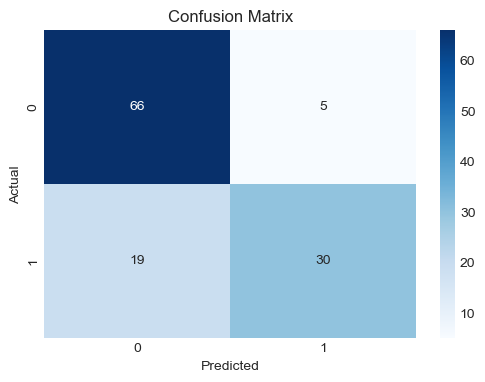

In [52]:
from sklearn.neural_network import MLPClassifier

X = df.drop("c", axis=1)
y = df["c"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y)

float_features = ['Age', 'chest pain', 'blood pressure', 'cholestoral',
                  'heart rate', 'depression', 'electrocardiographic']

sc = MinMaxScaler()

X_train[float_features] = sc.fit_transform(X_train[float_features])
X_test[float_features] = sc.transform(X_test[float_features])

mlp = MLPClassifier(
    max_iter = 500, 
    early_stopping = True, 
    random_state = 42
    )

param_grid_mlp = {
    'hidden_layer_sizes': [(32,), (32,16), (64,), (64,32), (128,64), (100, 120)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],   
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.001],
    'tol': [1e-4, 1e-5],  
    'momentum': [0.8]
}

grid_search_mlp = GridSearchCV(
    estimator = mlp,
    param_grid = param_grid_mlp,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

grid_search_mlp.fit(X_train, y_train)

print("Best Parameters:", grid_search_mlp.best_params_)
print("Best CV Accuracy:", grid_search_mlp.best_score_)

y_pred = grid_search_mlp.predict(X_test)

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_acc_mlp = grid_search_mlp.score(X_train, y_train)
test_acc_mlp = grid_search_mlp.score(X_test, y_test)

print("Train Accuracy:", train_acc_mlp)
print("Test Accuracy:", test_acc_mlp)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## SVM - Modeling - Optimization - Evaluation

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'C': 50, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Accuracy: 0.7962499999999999
Accuracy on Test Data: 0.825
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        71
           1       0.83      0.71      0.77        49

    accuracy                           0.82       120
   macro avg       0.83      0.81      0.81       120
weighted avg       0.83      0.82      0.82       120

Train Accuracy: 0.8487394957983193
Test Accuracy: 0.825


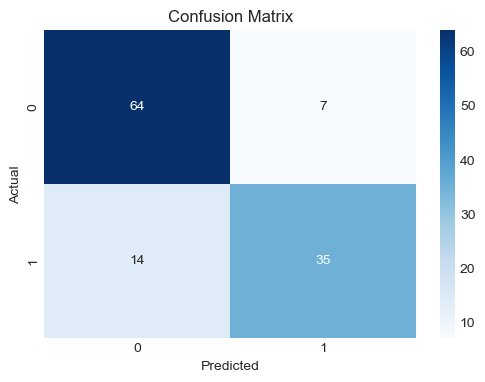

In [53]:
from sklearn.svm import SVC

X = df.drop("c", axis=1)
y = df["c"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 969, stratify = y)

float_features = ['Age', 'chest pain', 'blood pressure', 'cholestoral',
                  'heart rate', 'depression', 'electrocardiographic']

sc = MinMaxScaler()

X_train[float_features] = sc.fit_transform(X_train[float_features])
X_test[float_features] = sc.transform(X_test[float_features])

svm = SVC(probability = True, random_state = 969)

param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 50],
    'gamma': [0.01, 0.1, 10],  
    'degree': [2, 3, 4]                
}

grid_search_svm = GridSearchCV(
    estimator = svm,
    param_grid = param_grid_svm,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

grid_search_svm.fit(X_train, y_train)

print("Best Parameters:", grid_search_svm.best_params_)
print("Best CV Accuracy:", grid_search_svm.best_score_)

y_pred = grid_search_svm.predict(X_test)
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_acc_svm = grid_search_svm.score(X_train, y_train)
test_acc_svm = grid_search_svm.score(X_test, y_test)

print("Train Accuracy:", train_acc_svm)
print("Test Accuracy:", test_acc_svm)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Naive Bayes - Modeling - Optimization - Evaluation

Train Accuracy: 0.809
Test Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        71
           1       0.82      0.65      0.73        49

    accuracy                           0.80       120
   macro avg       0.81      0.78      0.78       120
weighted avg       0.80      0.80      0.80       120



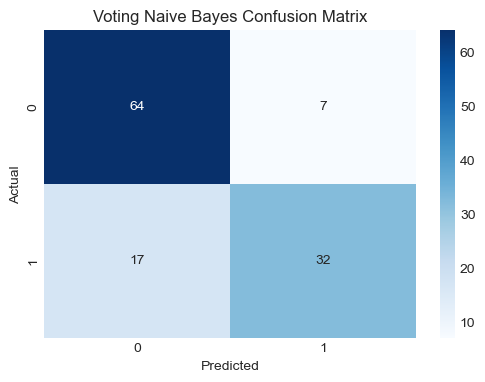

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

binary_features = ['sex', 'blood sugar', 'exercise induced']   
float_features  = ['Age', 'chest pain', 'blood pressure', 'cholestoral', 
                   'heart rate', 'depression', 'electrocardiographic']    

X_binary = df[binary_features]
X_float  = df[float_features]
y        = df['c']

X_train_f, X_test_f, y_train, y_test = train_test_split(
    X_float, y, test_size=0.2, random_state=45, stratify=y)
X_train_b, X_test_b, _, _ = train_test_split(
    X_binary, y, test_size=0.2, random_state=45, stratify=y)

sc = MinMaxScaler()
X_train_f = sc.fit_transform(X_train_f)
X_test_f  = sc.transform(X_test_f)

gnb = GaussianNB()
param_grid_gnb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid_gnb = GridSearchCV(gnb, param_grid_gnb, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
grid_gnb.fit(X_train_f, y_train)
best_gnb = grid_gnb.best_estimator_

bnb = BernoulliNB()
param_grid_bnb = {'alpha': [0.1, 0.5, 1.0]}
grid_bnb = GridSearchCV(bnb, param_grid_bnb, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
grid_bnb.fit(X_train_b, y_train)
best_bnb = grid_bnb.best_estimator_

X_train_nb = np.hstack((X_train_f, X_train_b))
X_test_nb  = np.hstack((X_test_f, X_test_b))

ensemble_nb = VotingClassifier(
    estimators=[('gnb', best_gnb), ('bnb', best_bnb)],
    voting='soft',
    weights=[2, 1]
)

ensemble_nb.fit(X_train_nb, y_train)

y_pred_nb = ensemble_nb.predict(X_test_nb)

train_acc_nb = ensemble_nb.score(X_train_nb, y_train)
test_acc_nb  = ensemble_nb.score(X_test_nb, y_test)

print("Train Accuracy:", round(train_acc_nb,3))
print("Test Accuracy:", round(test_acc_nb,3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Voting Naive Bayes Confusion Matrix")
plt.show()

## Logistic Regression - Modeling - Optimization - Evaluation

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'C': 0.1, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Accuracy: 0.7983552631578947
Accuracy on Test Data: 0.8
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        71
           1       0.76      0.76      0.76        49

    accuracy                           0.80       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.80      0.80      0.80       120

Train Accuracy: 0.8130252100840336
Test Accuracy: 0.8


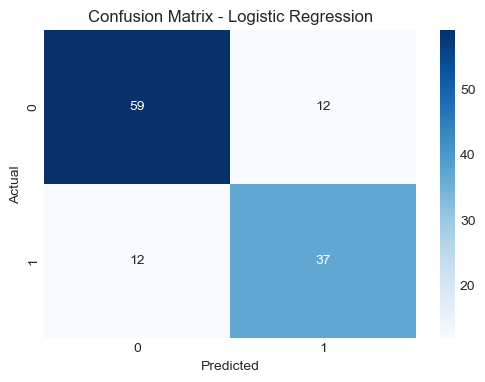

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("c", axis=1)
y = df["c"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=369, stratify=y
)

float_features = ['Age', 'chest pain', 'blood pressure', 'cholestoral',
                  'heart rate', 'depression', 'electrocardiographic']

sc = MinMaxScaler()

X_train[float_features] = sc.fit_transform(X_train[float_features])
X_test[float_features] = sc.transform(X_test[float_features])

logreg = LogisticRegression(max_iter=500, random_state=369, class_weight='balanced')

param_grid = {
    'C': [0.01, 0.1, 1, 10, 50, 100],     
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear','saga'],        
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]   
}

grid_logreg = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_logreg.fit(X_train, y_train)

print("Best Parameters:", grid_logreg.best_params_)
print("Best CV Accuracy:", grid_logreg.best_score_)

y_pred = grid_logreg.predict(X_test)

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_acc_lr = grid_logreg.score(X_train, y_train)
test_acc_lr = grid_logreg.score(X_test, y_test)

print("Train Accuracy:", train_acc_lr)
print("Test Accuracy:", test_acc_lr)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# <font color=#4d4dff>Final Results of Models</font>

                     Train Accuracy  Test Accuracy  CV Accuracy
Decision Tree                  0.81           0.81         0.78
KNN                            0.82           0.81         0.79
MLP                            0.82           0.80         0.83
SVM                            0.85           0.82         0.80
Voting Naive Bayes             0.81           0.80          NaN
Logistic Regression            0.81           0.80         0.80


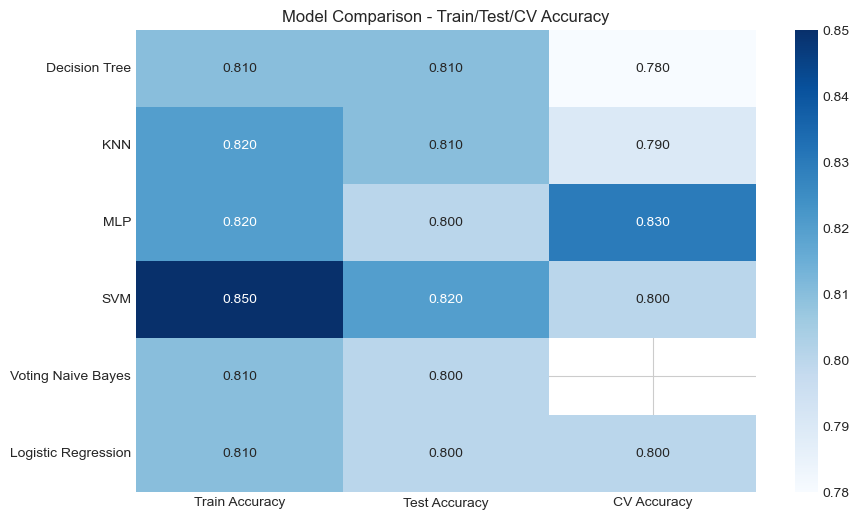

In [57]:
models = ['Decision Tree', 'KNN', 'MLP', 'SVM', 'Voting Naive Bayes', 'Logistic Regression']

train_acc = [train_acc_dt, train_acc_knn, train_acc_mlp, train_acc_svm, train_acc_nb, train_acc_lr]
test_acc  = [test_acc_dt, test_acc_knn, test_acc_mlp, test_acc_svm, test_acc_nb, test_acc_lr]
cv_acc    = [
    grid_search_dt.best_score_,
    grid_search_knn.best_score_,
    grid_search_mlp.best_score_,
    grid_search_svm.best_score_,
    np.nan, 
    grid_logreg.best_score_
]

df_metrics = pd.DataFrame({
    'Train Accuracy': train_acc,
    'Test Accuracy' : test_acc,
    'CV Accuracy'   : cv_acc
}, index=models).round(2)

print(df_metrics)

plt.figure(figsize=(10,6))
sns.heatmap(df_metrics, annot=True, cmap='Blues', fmt=".3f")
plt.title("Model Comparison - Train/Test/CV Accuracy")
plt.show()

# <font color=red>Special thanks to my instructor Dr. Amirreza tajally</font>